# Strategies for Mitigating Data Voids in KGs

Reem's version

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Kelpie.dataset import Dataset
import numpy as np
import pandas as pd
from helpers.helpers import print_fact, extract_subgraph_of_kg, print_entity, print_sample
from helpers.kelpie_models_helpers import train_complex
from helpers.knowledge_graph_simulation_experiment import KnowledgeGraphMitigationExperiment
import json

/home/rh3015/.conda/envs/opt-kelpie/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

fb15k237_path = 'Kelpie_package/Kelpie/data/FB15k-237'
train_path = fb15k237_path + '/train.txt'
test_path = fb15k237_path + '/test.txt'
valid_path = fb15k237_path + '/valid.txt'
fact_to_investigate = ("/m/0693l", "/film/director/film" ,"/m/0gwjw0c")
fb15k237_dataset = Dataset(name="FB15k-237", load=True, train_path=train_path, test_path=test_path, valid_path=valid_path)
sample_to_investigate = fb15k237_dataset.fact_to_sample(fact_to_investigate)

label_map_path = 'entity2wikidata.json'
label_map = json.load(open(label_map_path))

## All experiment pairs

In [4]:
experiment_pairs = [
    (["/m/012d40", "/film/actor/film./film/performance/film", "/m/01bl7g"], ["/m/012d40","/film/actor/film./film/performance/film", "/m/06x43v"]),
    (['/m/06pj8', '/film/director/film', '/m/012mrr'], ['/m/06pj8', '/film/director/film', '/m/011xg5']),
    (['/m/0h69c', '/sports/sports_league/teams./sports/sports_league_participation/team', '/m/04mjl'], ['/m/0h69c', '/sports/sports_league/teams./sports/sports_league_participation/team', '/m/07147']),
    (['/m/06pj8', '/film/director/film', '/m/012mrr'], ['/m/06pj8', '/film/director/film', '/m/025rvx0']),
    (['/m/06pj8', '/film/director/film', '/m/011xg5'], ['/m/06pj8', '/film/director/film', '/m/025rvx0'])    
]

### Jackie Chan Acted in Movies

#### Jackie Chan Acted in Shanghai Knights/Rush Hour 3

In [5]:
good_entity = "/m/01bl7g"
bad_entity = "/m/06x43v"
acted_in = "/film/actor/film./film/performance/film"
jackie_chan = "/m/012d40"

good_fact = [jackie_chan, acted_in, good_entity]
bad_fact =[jackie_chan, acted_in, bad_entity]


In [7]:
from helpers.helpers import print_fact
print_fact(good_fact, label_map)
print_fact(bad_fact, label_map)

Jackie Chan /film/actor/film./film/performance/film Shanghai Knights
Jackie Chan /film/actor/film./film/performance/film Rush Hour 3


Run the experiment

Explanations (budgets):

Good entity explanations samples for 
Jackie Chan /film/actor/film./film/performance/film Shanghai Knights

- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Shanghai Knights
- Shanghai Knights /film/film/executive_produced_by Jackie Chan
- Jackie Chan /people/person/languages English
- Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
- Jackie Chan /people/person/nationality Hong Kong
- Shanghai Noon /film/film/executive_produced_by Jackie Chan
- Chris Tucker /award/award_winner/awards_won./award/award_honor/award_winner Jackie Chan
- Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
- Jackie Chan /people/person/languages Standard Chinese
- MTV Movie Award for Best Fight /award/award_category/winners./award/award_honor/award_winner Jackie Chan
- Jackie Chan /people/person/spouse_s./people/marriage/type_of_union marriage
- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hong Kong Film Award for Best Action Choreography
- Jackie Chan /film/actor/film./film/performance/film Kung Fu Panda 2
- Hong Kong Film Award for Best Action Choreography /award/award_category/winners./award/award_honor/award_winner Jackie Chan
- Chris Tucker /award/award_nominee/award_nominations./award/award_nomination/award_nominee Jackie Chan
- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 3
- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award MTV Movie Award for Best Fight
- Jackie Chan /people/person/languages Yue Chinese
- Jackie Chan /people/person/profession film director
- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hundred Flowers Award for Best Actor


Bad entity explanations samples for 
Jackie Chan /film/actor/film./film/performance/film Rush Hour 3

- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 3
- Rush Hour 2 /award/award_winning_work/awards_won./award/award_honor/award_winner Jackie Chan
- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 2
- MTV Movie Award for Best Fight /award/award_category/winners./award/award_honor/award_winner Jackie Chan
- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award MTV Movie Award for Best Fight
- Jackie Chan /film/actor/film./film/performance/film Rush Hour 2
- Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
- Jackie Chan /people/person/spouse_s./people/marriage/location_of_ceremony Los Angeles
- Jackie Chan /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency United States dollar
- Jackie Chan /people/person/spouse_s./people/marriage/type_of_union marriage
- Jackie Chan /people/person/profession film producer
- Jackie Chan /people/person/profession film director
- Jackie Chan /people/person/nationality Hong Kong
- Jackie Chan /people/person/languages English
- Jackie Chan /film/actor/film./film/performance/film Kung Fu Panda 2
- Jackie Chan /film/actor/film./film/performance/film Cannonball Run II
- Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
- Owen Wilson /award/award_nominee/award_nominations./award/award_nomination/award_nominee Jackie Chan
- Jackie Chan /film/actor/film./film/performance/film Rush Hour
- Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Shanghai Knights

### Mitigator Random, Disinformer Random

Fact in question:
['/m/012d40', '/film/actor/film./film/performance/film', '/m/01bl7g']
Jackie Chan /film/actor/film./film/performance/film Shanghai Knights
	 saving model...
	 done.

Removing (446, 28, 281)
Removing (446, 28, 98)
	 saving model...
	 done.

Loading dataset <Kelpie.dataset.Dataset object at 0x15549ca35e50>...
Explaining fact 0 on 1: </m/012d40,/film/actor/film./film/performance/film,/m/01bl7g>
Extracting promising facts for</m/012d40, /film/actor/film./film/performance/film, /m/01bl7g>
	Analyzing sample 1 on 47: </m/09v51c2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
	Analyzing sample 2 on 47: </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
	Analyzing sample 3 on 47: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
	Analyzing sample 4 on 47: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
	Analyzing sample 5 on 47: </m/062f2j, /music/genre/artists, /m/012d40>
	Analyzing sample 6 

	Obtained relevance: 0.5006201264062778

	Computing relevance for sample 10 on 30: </m/01f6x7, /film/film/executive_produced_by, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01f6x7, /film/film/executive_produced_by, /m/012d40>
	Obtained relevance: 0.500157356257012

	Computing relevance for sample 11 on 30: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
	Obtained relevance: 0.4968173933707177

	Computing relevance for sample 12 on 30: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: 0.5094092703559889

	Computing relevance for sample 13 on

	Analyzing sample 46 on 47: </m/02gpkt, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>	Analyzing sample 47 on 47: </m/012d40, /people/person/places_lived./people/place_lived/location, /m/0dp90>


	Computing relevance for sample 0 on 30: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
	Obtained relevance: 0.5366909198227953

	Computing relevance for sample 1 on 30: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: 0.4780957321453253

	Computing relevance for sample

	Obtained relevance: 0.5036284286599239

	Computing relevance for sample 26 on 30: </m/034qmv, /film/film/executive_produced_by, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/034qmv, /film/film/executive_produced_by, /m/012d40>
	Obtained relevance: 0.49040983526701737

	Computing relevance for sample 27 on 30: </m/012d40, /people/person/profession, /m/03gjzk>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/profession, /m/03gjzk>
	Obtained relevance: 0.49700740572993657

	Computing relevance for sample 28 on 30: </m/012d40, /people/person/profession, /m/02hrh1q>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/profession, /m/02hrh1q>
	Obtained relevance: 0.508117200975224

	Computing relevance for sample 29 on 30: </m/012d40, /film/actor/film./film/performance/film, /m/09146g>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor

	 saving model...
	 done.

Good entity rank 2
Bad entity rank 6
Attack budget left for mitigator 6
Valid budget left: mitigator 6
Round number 5
Attack budget left for disinformer 6
Valid budget left: disinformer 6
Budget candidates: {(446, 28, 725), (446, 8, 19), (19, 5, 446), (446, 28, 58), (446, 4, 9), (446, 2, 281)}
disinformer wants to add the following sample to the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 3
Leftover cost is inf
Attack budget left for mitigator 6
Valid budget left: mitigator 6
Budget candidates: {(446, 8, 900), (446, 28, 182), (98, 71, 446), (446, 28, 58), (446, 8, 364), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Chris Tucker /award/award_nominee/award_nominations./award/award_nomination/award_nominee Jackie Chan
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity rank 2
Bad entity rank 3
Attack budget left for mitigator

	 saving model...
	 done.

Good entity rank 4
Bad entity rank 3
Attack budget left for mitigator 7
Valid budget left: mitigator 7
Round number 4
Attack budget left for disinformer 7
Valid budget left: disinformer 7
Budget candidates: {(446, 4, 13), (446, 28, 725), (446, 8, 19), (19, 5, 446), (446, 2, 725), (446, 4, 9), (446, 28, 422)}
disinformer wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Rush Hour
Leftover cost is inf
Attack budget left for mitigator 7
Valid budget left: mitigator 7
Budget candidates: {(446, 69, 93), (27, 20, 446), (98, 71, 446), (446, 28, 182), (446, 8, 364), (446, 2, 98), (446, 28, 422)}
mitigator wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Rush Hour
Dataset already contains the sample
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity rank 4
Bad entity rank 1
Attack budget left for mitigator 6
Valid budget left: mitigator 6


	 saving model...
	 done.

Good entity rank 7
Bad entity rank 16
Attack budget left for mitigator 8
Valid budget left: mitigator 8
Round number 3
Attack budget left for disinformer 8
Valid budget left: disinformer 8
Budget candidates: {(446, 28, 725), (446, 2, 725), (446, 28, 422), (446, 2, 281), (446, 8, 19), (19, 5, 446), (446, 28, 58), (446, 4, 9)}
disinformer wants to add the following sample to the dataset
Jackie Chan /people/person/profession film director
Leftover cost is inf
Attack budget left for mitigator 8
Valid budget left: mitigator 8
Budget candidates: {(446, 28, 182), (446, 8, 364), (446, 2, 98), (446, 28, 422), (446, 8, 900), (98, 71, 446), (446, 28, 58), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hong Kong Film Award for Best Action Choreography
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity rank 8
Bad enti

	 saving model...
	 done.

Good entity rank 16
Bad entity rank 7
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Round number 2
Attack budget left for disinformer 9
Valid budget left: disinformer 9
Budget candidates: {(446, 28, 725), (446, 28, 422), (446, 2, 281), (446, 4, 13), (725, 34, 446), (446, 8, 19), (19, 5, 446), (446, 28, 58), (446, 4, 9)}
disinformer wants to add the following sample to the dataset
Rush Hour 2 /award/award_winning_work/awards_won./award/award_honor/award_winner Jackie Chan
Leftover cost is inf
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Budget candidates: {(27, 19, 446), (446, 28, 182), (446, 8, 364), (446, 2, 98), (446, 28, 422), (446, 69, 93), (98, 71, 446), (446, 28, 58), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity rank 5
Ba

	 saving model...
	 done.

Good entity rank 2
Bad entity rank 6
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Round number 2
Attack budget left for disinformer 9
Valid budget left: disinformer 9
Budget candidates: {(446, 2, 725), (446, 28, 422), (446, 2, 281), (446, 4, 13), (725, 34, 446), (446, 8, 19), (19, 5, 446), (446, 28, 58), (446, 4, 9)}
disinformer wants to add the following sample to the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 2
Leftover cost is inf
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Budget candidates: {(27, 19, 446), (446, 28, 182), (446, 8, 364), (446, 28, 422), (446, 69, 93), (446, 8, 900), (98, 71, 446), (446, 28, 58), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hundred Flowers Award for Best Actor
Leftover cost is inf
Re-training model, dataset wa

	 saving model...
	 done.

Good entity rank 4
Bad entity rank 13
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Round number 2
Attack budget left for disinformer 9
Valid budget left: disinformer 9
Budget candidates: {(446, 28, 725), (446, 2, 725), (446, 28, 422), (446, 2, 281), (446, 4, 13), (725, 34, 446), (446, 8, 19), (19, 5, 446), (446, 4, 9)}
disinformer wants to add the following sample to the dataset
Jackie Chan /people/person/profession actor
Leftover cost is inf
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Budget candidates: {(27, 19, 446), (446, 28, 182), (446, 8, 364), (446, 2, 98), (446, 28, 422), (446, 69, 93), (446, 8, 900), (98, 71, 446), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hundred Flowers Award for Best Actor
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity rank 3

	 saving model...
	 done.

Good entity rank 4
Bad entity rank 14
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Round number 2
Attack budget left for disinformer 9
Valid budget left: disinformer 9
Budget candidates: {(446, 28, 725), (446, 2, 725), (446, 28, 422), (446, 2, 281), (446, 4, 13), (725, 34, 446), (446, 8, 19), (19, 5, 446), (446, 28, 58)}
disinformer wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
Leftover cost is inf
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Budget candidates: {(27, 19, 446), (446, 28, 182), (446, 8, 364), (446, 2, 98), (446, 28, 422), (446, 69, 93), (446, 8, 900), (446, 28, 58), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Rush Hour
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity rank 1
Bad entity rank 6
Attack budget

	 saving model...
	 done.

Good entity rank 4
Bad entity rank 11
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Round number 2
Attack budget left for disinformer 9
Valid budget left: disinformer 9
Budget candidates: {(446, 28, 725), (446, 2, 725), (446, 28, 422), (446, 2, 281), (725, 34, 446), (446, 8, 19), (19, 5, 446), (446, 28, 58), (446, 4, 9)}
disinformer wants to add the following sample to the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 3
Leftover cost is inf
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Budget candidates: {(27, 19, 446), (446, 28, 182), (446, 8, 364), (446, 2, 98), (446, 28, 422), (446, 69, 93), (446, 8, 900), (98, 71, 446), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hong Kong Film Award for Best Action Choreography
Leftover cost is inf
Re-training mo

	 saving model...
	 done.

Good entity rank 14
Bad entity rank 12
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Round number 2
Attack budget left for disinformer 9
Valid budget left: disinformer 9
Budget candidates: {(446, 28, 725), (446, 2, 725), (446, 28, 422), (446, 2, 281), (446, 4, 13), (725, 34, 446), (446, 8, 19), (19, 5, 446), (446, 28, 58)}
disinformer wants to add the following sample to the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 2
Leftover cost is inf
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Budget candidates: {(27, 19, 446), (446, 8, 364), (446, 2, 98), (446, 28, 422), (446, 69, 93), (446, 8, 900), (98, 71, 446), (446, 28, 58), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity

	 saving model...
	 done.

Good entity rank 4
Bad entity rank 10
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Round number 2
Attack budget left for disinformer 9
Valid budget left: disinformer 9
Budget candidates: {(446, 28, 725), (446, 2, 725), (446, 28, 422), (446, 2, 281), (446, 4, 13), (725, 34, 446), (446, 8, 19), (446, 28, 58), (446, 4, 9)}
disinformer wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
Dataset already contains the sample
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Budget candidates: {(27, 19, 446), (446, 28, 182), (446, 8, 364), (446, 2, 98), (446, 28, 422), (446, 69, 93), (446, 8, 900), (98, 71, 446), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity rank 3

	 saving model...
	 done.

Good entity rank 13
Bad entity rank 7
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Round number 2
Attack budget left for disinformer 9
Valid budget left: disinformer 9
Budget candidates: {(446, 28, 725), (446, 2, 725), (446, 28, 422), (446, 2, 281), (446, 4, 13), (446, 8, 19), (19, 5, 446), (446, 28, 58), (446, 4, 9)}
disinformer wants to add the following sample to the dataset
Jackie Chan /people/person/profession film director
Leftover cost is inf
Attack budget left for mitigator 9
Valid budget left: mitigator 9
Budget candidates: {(27, 19, 446), (446, 8, 364), (446, 2, 98), (446, 28, 422), (446, 69, 93), (446, 8, 900), (98, 71, 446), (446, 28, 58), (27, 20, 446)}
mitigator wants to add the following sample to the dataset
Jackie Chan /film/actor/film./film/performance/film Rush Hour
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.

Good entity rank 7
Bad entity rank 4
Attack budget left for mitigato

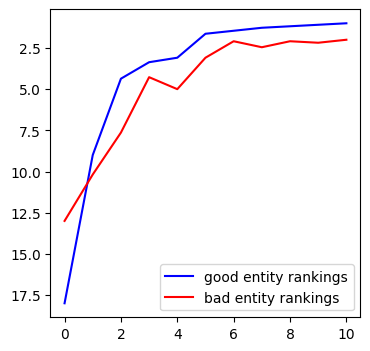

Mitigator AUC is: 35.954545454545446
Disinformer AUC is: 46.5


In [8]:
experiment = KnowledgeGraphMitigationExperiment('experiment_jackie_chan_random_greedy', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['reduced_datasets/Jackie Chan_Shanghai Knights_Rush Hour 3_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="random", disinformer_strategy="random", num_attack_budget=10, num_experiments_random=10)

experiment.run_experiment()


### Mitigator Random, Disinformer Greedy

In [7]:

experiment_jackie_chan_random_greedy = KnowledgeGraphMitigationExperiment('experiment_jackie_chan_random_greedy', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['jackie_chan_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="random", disinformer_strategy="greedy", num_attack_budget=15, num_experiments_random=1)

experiment_jackie_chan_random_greedy.run_experiment()


Fact in question:
['/m/012d40', '/film/actor/film./film/performance/film', '/m/01bl7g']
Jackie Chan /film/actor/film./film/performance/film Shanghai Knights


train loss: 100%|██████████| 27210/27210 [00:00<00:00, 63093.72ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Removing (446, 28, 281)
Removing (446, 28, 98)


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63077.99ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Loading dataset <Kelpie.dataset.Dataset object at 0x15546bdb2430>...
Explaining fact 0 on 1: </m/012d40,/film/actor/film./film/performance/film,/m/01bl7g>
Extracting promising facts for</m/012d40, /film/actor/film./film/performance/film, /m/01bl7g>
	Analyzing sample 1 on 47: </m/09v51c2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
	Analyzing sample 2 on 47: </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
	Analyzing sample 3 on 47: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
	Analyzing sample 4 on 47: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Analyzing sample 5 on 47: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
	Analyzing sample 6 on 47: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
	Analyzing sample 7 on 47: </m/012d40, /people/person/nationality, /m/03h64>
	Analyzing s


	Obtained relevance: 1.61291101556727

	Computing relevance for rule: </m/01bl7g, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01bl7g, /film/film/executive_produced_by, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.576383408398625

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.57571940290446

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing sampl


	Obtained relevance: 1.6292993042632047

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.6162294756303979

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_n


	Obtained relevance: 1.5716617541907674

	Current relevance 1.5716617541907674
	Current averaged window relevance 1.5853956406143894
	Max relevance seen so far 1.6317565011549444
	Terminate threshold:0.9715883708704447
	Random value:0.029797219438070344
	Terminate:False

	Computing relevance for rule: </m/01bl7g, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01bl7g, /film/film/executive_produced_by, /m/012d40>
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.5724436366455739

	Current relevance 1.5724436366455739
	Current averaged window relevance 1.5816729034907462
	Max relevance seen so far 1.6317565011549444
	Terminate threshold:0.9693069415511754
	Random value:0.21863797480360336
	Terminate:False

	Computing


	Obtained relevance: 1.6353091719508066

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.6326770840060885

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/01bl7g, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7> + </m/05ztrmj, /a


	Obtained relevance: 1.6122148088349846

	Current relevance 1.6122148088349846
	Current averaged window relevance 1.6232440288019938
	Max relevance seen so far 1.6488417065514316
	Terminate threshold:0.9844753576721591
	Random value:0.6981393949882269
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.6126091410274515

	Current relevance 1.6126091410274515
	Current av


	Obtained relevance: 1.5982276167671525

	Current relevance 1.5982276167671525
	Current averaged window relevance 1.607570102950876
	Max relevance seen so far 1.6488417065514316
	Terminate threshold:0.9749693354816482
	Random value:0.8071282732743802
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
		

	Obtained relevance: 0.4981097073015453

	Computing relevance for sample 2 on 10: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
	Obtained relevance: 0.4960043088846684

	Computing relevance for sample 3 on 10: </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
	Obtained relevance: 0.4825156720390597

	Computing relevance for sample 4 on 10: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nomine


	Obtained relevance: 0.5169474505753697

	Current relevance 0.5169474505753697
	Current averaged window relevance 0.5269426891204005
	Max relevance seen so far 0.5548669264963749
	Terminate threshold:0.9496739920104846
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>

	Obtained relevance: 0.5152697748401869

	Current relevance 0.5152697748401869
	Current averaged window relevance 0.5245339292884753
	Max relevance seen so far 0.5548669264963749
	Terminate threshold:0.9453328433189687
	Random value:0.22321073814882275
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./a


	Obtained relevance: 0.49774707888369496

	Current relevance 0.49774707888369496
	Current averaged window relevance 0.5044688158362305
	Max relevance seen so far 0.5548669264963749
	Terminate threshold:0.9091708151026845
	Random value:0.5449414806032167
	Terminate:False

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>

	Obtained relevance: 0.49969804290627695

	Current relevance 0.49969804290627695
	Current averaged window relevance 0.5033148922818544
	Max relevance seen so far 0.5548669264963749
	Terminate threshold:0.9070911749236197
	Random value:0.2204406220406967
	Termina


	Obtained relevance: 0.5571650345473339

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/01f6x7, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/01f6x7, /film/film/executive_produced_by, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5563550910571036

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /film/actor/fi


	Obtained relevance: 0.5384426481127997

	Current relevance 0.5384426481127997
	Current averaged window relevance 0.5453551367937135
	Max relevance seen so far 0.569726413652997
	Terminate threshold:0.9572228419198283
	Random value:0.8071282732743802
	Terminate:False

	Computing relevance for rule: </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5376561565593077

	Current relevance 0.5376561565593077
	Current averaged window relevance 0.54


	Obtained relevance: 0.5592557270404866

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/01f6x7, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/01f6x7, /film/film/executive_produced_by, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5585607444912682

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m


	Obtained relevance: 0.5521907189241878

	Current relevance 0.5521907189241878
	Current averaged window relevance 0.5551916935568387
	Max relevance seen so far 0.5765287029590997
	Terminate threshold:0.9629905513936317
	Random value:0.045824383655662215
	Terminate:False

	Computing relevance for rule: </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/01f6x7, /film/film/executive_produced_by, /m/012d40> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/01f6x7, /film/film/executive_produced_by, /m/012d40>
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qm


	Obtained relevance: 0.5455047881635249

	Current relevance 0.5455047881635249
	Current averaged window relevance 0.5495359565373533
	Max relevance seen so far 0.5765287029590997
	Terminate threshold:0.9531805679696378
	Random value:0.37018096711688264
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/0653m> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/0653m>
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5432633400411272

	Current relevance 0.5432633400411272
	Current averaged window relevance 0.5


	Obtained relevance: 0.5380457519199993

	Current relevance 0.5380457519199993
	Current averaged window relevance 0.541176454952774
	Max relevance seen so far 0.5765287029590997
	Terminate threshold:0.9386808534859127
	Random value:0.3794554417576478
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5386603337221944

	Current relevance 0.538660333

	Obtained relevance: 0.48395755375705996

	Computing relevance for sample 8 on 10: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
	Obtained relevance: 0.5073980654007303

	Computing relevance for sample 9 on 10: </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
	Obtained relevance: 0.49910926913075465

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/0


	Obtained relevance: 0.4993619922285959

	Current relevance 0.4993619922285959
	Current averaged window relevance 0.5016634522449143
	Max relevance seen so far 0.5097696266333023
	Terminate threshold:0.9840983574444715
	Random value:0.7364712141640124
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Obtained relevance: 0.4987628485177372

	Current relevance 0.4987628485177372
	Current averaged window relevance 0.5010262968930153
	Max relevance seen so far 0.5097696266333023
	Terminate threshold:0.982848468634683
	Random value:0.6766994874229113
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /award/award_nominee/award_nominations


	Obtained relevance: 0.48397839393481895

	Current relevance 0.48397839393481895
	Current averaged window relevance 0.49064092403440285
	Max relevance seen so far 0.5097696266333023
	Terminate threshold:0.9624757898479905
	Random value:0.2204406220406967
	Terminate:False

	Computing relevance for rule: </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>

	Obtained relevance: 0.4830852943892722

	Current relevance 0.4830852943892722
	Current averaged window relevance 0.48939713199673374
	Max relevance seen so far 0.5097696266333023
	Terminate threshold:0.9600358797931614
	Random value:0.5892656838759087
	Terminate:F


	Obtained relevance: 0.5085726919348247

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Obtained relevance: 0.5077757526408008

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-t


	Obtained relevance: 0.5030206074401471

	Current relevance 0.5030206074401471
	Current averaged window relevance 0.5054720880978064
	Max relevance seen so far 0.5114568680149048
	Terminate threshold:0.988298563786372
	Random value:0.6037260313668911
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>

	Obtained relevance: 0.5049266412806576

	Current relevance 0.5049266412806576
	Current averaged window relevance 0.5051927665350096
	Max relevance seen so far 0.5114568680149048
	Terminate thresh


	Obtained relevance: 0.4999752044677938

	Current relevance 0.4999752044677938
	Current averaged window relevance 0.501214754259195
	Max relevance seen so far 0.5114568680149048
	Terminate threshold:0.9799746285635738
	Random value:0.577352145256762
	Terminate:False

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Obtained relevance: 0.4978091856970369

	Current relevance 0.4978091856970369
	Current averaged window relevance 0.500503008700833


	Obtained relevance: 0.492534477047924

	Current relevance 0.492534477047924
	Current averaged window relevance 0.49686461149738526
	Max relevance seen so far 0.5114568680149048
	Terminate threshold:0.9714692334191233
	Random value:0.36483217897008424
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>

	Obtained relevance: 0.49253507296150206

	Current relevance 0.49253507296150206
	Current averaged window relevance 0.49633720022383176
	Max relevanc


	Obtained relevance: 0.48746479019717365

	Current relevance 0.48746479019717365
	Current averaged window relevance 0.48973198721578237
	Max relevance seen so far 0.5114568680149048
	Terminate threshold:0.957523532955101
	Random value:0.3794554417576478
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>

	Obtained relevance: 0.4870573590933636

	Current relevance 0.4870573590933636
	Current averaged window relevance 0.4891842158289685



	Obtained relevance: 0.5049616853848584

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>

	Obtained relevance: 0.5081813185360883

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/awa


	Obtained relevance: 0.5027311768687561

	Current relevance 0.5027311768687561
	Current averaged window relevance 0.5052159231791412
	Max relevance seen so far 0.5122258130978199
	Terminate threshold:0.9863148444700892
	Random value:0.3154530480590819
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
			</m/012d40, /awar


	Obtained relevance: 0.5009994493524585

	Current relevance 0.5009994493524585
	Current averaged window relevance 0.5016642894893433
	Max relevance seen so far 0.5122258130978199
	Terminate threshold:0.9793811179788011
	Random value:0.9145475897405435
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Obtained relevance: 0.4963287774855417

	Curr


	Obtained relevance: 0.49445639915716466

	Current relevance 0.49445639915716466
	Current averaged window relevance 0.49775247743800655
	Max relevance seen so far 0.5122258130978199
	Terminate threshold:0.9717442282490958
	Random value:0.39940050514039727
	Terminate:False

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
			</m/012d40, /award/award_nominee/award_nominations./award/awa

	Obtained relevance: 0.4974971026627568

	Computing relevance for sample 6 on 10: </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/012w70>
	Obtained relevance: 0.5001254081699776

	Computing relevance for sample 7 on 10: </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: 0.5121739879294208

	Computing relevance for sample 8 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
	Obtained relevance: 0.5330237300526158

	Computing relevance for sample 9 on 10: 


	Obtained relevance: 0.5105882548535111

	Current relevance 0.5105882548535111
	Current averaged window relevance 0.5198168976645829
	Max relevance seen so far 0.5471571412963999
	Terminate threshold:0.9500321908126088
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/012w70> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/012w70>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>

	Obtained relevance: 0.5102027795213238

	Current relevance 0.5102027795213238
	Current averaged window relevance 0.5176911007911684
	Max relevance seen so far 0.5471571412963999
	Terminate threshold:0.946147023804868
	Random value:0.22321073814882275
	Terminate:False

	Computing relevance for rule: </m/012d40, /film/actor/


	Obtained relevance: 0.4958169244190909

	Current relevance 0.4958169244190909
	Current averaged window relevance 0.5004059989384912
	Max relevance seen so far 0.5471571412963999
	Terminate threshold:0.9145562785726612
	Random value:0.6498844377795232
	Terminate:False

	Computing relevance for rule: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>

	Obtained relevance: 0.4933126384419679

	Current relevance 0.4933126384419679
	Current averaged window relevance 0.49882484081379913
	Max relevance seen so far 0.5471571412963999
	Terminate threshold:0.9116665088788108
	Random value:0.5449414806032167
	Terminate:False

	Computing relevance for 


	Obtained relevance: 0.5479167283085302

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>

	Obtained relevance: 0.5453072321999807

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d4


	Obtained relevance: 1.5330014164044141

	Current relevance 1.5330014164044141
	Current averaged window relevance 0.9393369429163361
	Max relevance seen so far 1.5500237272047084
	Terminate threshold:0.6060145573450824
	Random value:0.8474943663474598
	Terminate:True

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/012w70> + </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/012w70>
			</m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /award/award_nominee/award_nomi


	Obtained relevance: 0.5453235479554076

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>

	Obtained relevance: 1.5477422673629142

	Current relevance 1.5477422673629142
	Current averaged window relevance 0.8

	Obtained relevance: 0.4992146498462861

	Computing relevance for sample 6 on 10: </m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: 0.5103694827341897

	Computing relevance for sample 7 on 10: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
	Obtained relevance: 0.5041524409221737

	Computing relevance for sample 8 on 10: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/01


	Obtained relevance: 0.5179735430472422

	Current relevance 0.5179735430472422
	Current averaged window relevance 0.5258804299734712
	Max relevance seen so far 0.5500282118111128
	Terminate threshold:0.9560971940727754
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>

	Obtained relevance: 0.5135617362959018

	Current relevance 0.5135617362959018
	Current averaged window relevance 0.522843534906477
	Max relevance seen so far 0.5500282118111128
	Terminate threshold:0.9505758498911844
	Random value:0.223210738148822


	Obtained relevance: 0.5035476089238528

	Current relevance 0.5035476089238528
	Current averaged window relevance 0.5073736307049697
	Max relevance seen so far 0.5500282118111128
	Terminate threshold:0.9224501940260633
	Random value:0.6498844377795232
	Terminate:False

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>

	Obtained relevance: 0.5030896270417466

	Current relevance 0.5030896270417466
	Current averaged window relevance 0.5066654731918667
	Max relevance seen so far 0.5500282118111128
	Terminate threshold:0.


	Obtained relevance: 0.5613122655543343

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>

	Obtained relevance: 0.5571845645351535

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40


	Obtained relevance: 0.5443089498990878

	Current relevance 0.5443089498990878
	Current averaged window relevance 0.5502612845414493
	Max relevance seen so far 0.5615189084178662
	Terminate threshold:0.9799514785563742
	Random value:0.09671637683346401
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>

	Obtained relevance: 0.5449603220847824

	Current relevance 0.5449603220847824
	Current averaged window relevance 0.


	Obtained relevance: 0.5622167569719891

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>

	Obtained relevance: 0.5694301868980561

	Computing relevance for r


	Obtained relevance: 0.5557148552565614

	Current relevance 0.5557148552565614
	Current averaged window relevance 0.5602187185917249
	Max relevance seen so far 0.5734823563612699
	Terminate threshold:0.9768717596584795
	Random value:0.8294046642529949
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/05ztrmj, /a


	Obtained relevance: 0.5514864535438099

	Current relevance 0.5514864535438099
	Current averaged window relevance 0.5555864590281373
	Max relevance seen so far 0.5734823563612699
	Terminate threshold:0.9687943366790192
	Random value:0.0797919769236275
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/02_sr1, /award/award_winning_work/awards_won


	Obtained relevance: 0.5445989405409254

	Current relevance 0.5445989405409254
	Current averaged window relevance 0.5488702178106362
	Max relevance seen so far 0.5734823563612699
	Terminate threshold:0.9570830065168926
	Random value:0.26697782204911336
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /award/award_nominee/award_nominat


	Obtained relevance: 0.537703095349275

	Current relevance 0.537703095349275
	Current averaged window relevance 0.5427440210129657
	Max relevance seen so far 0.5734823563612699
	Terminate threshold:0.9464005561682175
	Random value:0.9895233506365952
	Terminate:True
*******************
Best rule found: [(446, 2, 281), (725, 34, 446), (446, 2, 725), (19, 5, 446)]

Current budget
[(446, 2, 281), (725, 34, 446), (446, 2, 725), (19, 5, 446)]
*******************
Loading dataset <Kelpie.dataset.Dataset object at 0x15546bda6850>...
Explaining fact 0 on 1: </m/012d40,/film/actor/film./film/performance/film,/m/06x43v>
Extracting promising facts for</m/012d40, /film/actor/film./film/performance/film, /m/06x43v>
	Analyzing sample 1 on 43: </m/09v51c2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
	Analyzing sample 2 on 43: </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
	Analyzing sample 3 on 43: </m/012d40, /people/person/spouse_s./people/marriage/type


	Obtained relevance: 0.5751126853607522

	Computing relevance for rule: </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5650736347858754

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>

	Obtained relevance: 0.5621853033069653

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/perform


	Obtained relevance: 0.5009368647101764

	Current relevance 0.5009368647101764
	Current averaged window relevance 0.513632997335276
	Max relevance seen so far 0.5751126853607522
	Terminate threshold:0.8930997531607016
	Random value:0.8921795677048454
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.49968993667762407

	Current relevance 0.49968993667762407
	Current averaged window relevance 0.5094365769065752
	Max relevance seen so far 0.5751126853607522
	Terminate threshold:0.8858030606419676
	Random value:0.08693883262941615
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/p


	Obtained relevance: 0.4824058963195805

	Current relevance 0.4824058963195805
	Current averaged window relevance 0.492462778617056
	Max relevance seen so far 0.5751126853607522
	Terminate threshold:0.8562891954089793
	Random value:0.8094304566778266
	Terminate:False

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /film/actor/film./film/performance/film, /m/01mszz>

	Obtained relevance: 0.48167370526906034

	Current relevance 0.48167370526906034
	Current averaged window relevance 0.4907324186508483
	Max relevance seen so far 0.5751126853607522
	Terminate threshold:0.853280463363498
	Random value:0.006498759678061017
	Terminate:False

	Com


	Obtained relevance: 0.5656873763812797

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>

	Obtained relevance: 0.5630552578871776

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people


	Obtained relevance: 0.5749899862133874

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
			</m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>

	Obtained relevance: 0.5751034803325547

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/awa

	Analyzing sample 39 on 40: </m/012d40, /people/person/profession, /m/03gjzk>
	Analyzing sample 40 on 40: </m/01f6x7, /film/film/executive_produced_by, /m/012d40>

	Computing relevance for sample 0 on 10: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: -0.5292854902862705

	Computing relevance for sample 1 on 10: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
	Obtained relevance: 0.49913227645249125

	Computing relevance for sample 2 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_n


	Obtained relevance: -0.5050125826873786

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /people/person/languages, /m/012w70>

	Obtained relevance: 0.4817976365510699

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /film/actor/film./fi


	Obtained relevance: -0.5045151675215946

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/012w70>

	Obtained relevance: -0.5098657914390659

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/perfor

	Analyzing sample 34 on 38: </m/012d40, /people/person/languages, /m/012w70>	Analyzing sample 35 on 38: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
	Analyzing sample 36 on 38: </m/012d40, /people/person/profession, /m/02jknp>
	Analyzing sample 37 on 38: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz>

	Analyzing sample 38 on 38: </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Computing relevance for sample 0 on 10: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: -0.5296178805868846

	Computing relevance for sample 1 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40


	Obtained relevance: -0.48419215781952085

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/012w70> + </m/012d40, /people/person/profession, /m/01d_h8> + </m/012d40, /people/person/profession, /m/02jknp>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/012w70>
			</m/012d40, /people/person/profession, /m/01d_h8>
			</m/012d40, /people/person/profession, /m/02jknp>

	Obtained relevance: 0.5123037290628876

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /people/person/profession, /m/01d_h8> + </m/012d40, /people/person/profession, /m/02jknp>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /people/person/profession, /m/01d_h8>
			</m/012d40, /people/person/profession, /m/02jknp>

	Obtained relevance: 1.5118884087160107

	Com


	Obtained relevance: 0.4748964561516416

	Computing relevance for rule: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /people/person/profession, /m/01d_h8> + </m/012d40, /people/person/profession, /m/02jknp>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /people/person/profession, /m/01d_h8>
			</m/012d40, /people/person/profession, /m/02jknp>

	Obtained relevance: -0.525449080724439

	Computing relevance for rule: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /people/person/profession, /m/01d_h8> + </m/012d40, /people/person/profes

	Analyzing sample 34 on 35: </m/02gpkt, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>	Analyzing sample 35 on 35: </m/012d40, /people/person/places_lived./people/place_lived/location, /m/0dp90>


	Computing relevance for sample 0 on 10: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: -1.52880752983405

	Computing relevance for sample 1 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
	Obtained relevance: -0.5209123613119486

	Computing relevance for sample


	Obtained relevance: 0.48292288079668044

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>

	Obtained relevance: -0.5181552189718391

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m


	Obtained relevance: -1.520510244295701

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /people/person/languages, /m/012w70>

	Obtained relevance: 0.48028407093364217

	Computing relevance for rule: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /film/actor/film./film/performance/film, /m/02sfnv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film.


	Computing relevance for sample 0 on 10: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: -1.5290759213454024

	Computing relevance for sample 1 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
	Obtained relevance: -0.5215194719814766

	Computing relevance for sample 2 on 10: </m/012d40, /people/person/languages, /m/02h40lc>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
	Obtained relevance: -0.49678759226714075

	Computi


	Obtained relevance: 0.49148880210565904

	Computing relevance for rule: </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /film/actor/film./film/performance/film, /m/02sfnv> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /film/actor/film./film/performance/film, /m/02sfnv>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>

	Obtained relevance: -0.5113905031014576

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/lan


	Obtained relevance: -0.538515290616953

	Computing relevance for rule: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /film/actor/film./film/performance/film, /m/02sfnv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /film/actor/film./film/performance/film, /m/02sfnv>

	Obtained relevance: -0.5309136878044425

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /award/award_no

train loss: 100%|██████████| 27158/27158 [00:00<00:00, 62926.77ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 15
Bad entity rank 9
Good entity explanations samples for 
Jackie Chan /film/actor/film./film/performance/film Shanghai Knights
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Shanghai Knights
Shanghai Knights /film/film/executive_produced_by Jackie Chan
Jackie Chan /people/person/languages English
Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
Jackie Chan /people/person/nationality Hong Kong
Shanghai Noon /film/film/executive_produced_by Jackie Chan
Chris Tucker /award/award_winner/awards_won./award/award_honor/award_winner Jackie Chan
Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
Jackie Chan /people/person/languages Standard Chinese
MTV Movie Award for Best Fight /award/award_category/winners./award/award_honor/award_winner Jackie Chan
Jackie Chan /people/person/spouse_s./people/marriage/type_of_union marriage
Jackie Chan /award/award_nominee/award_

train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62954.71ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62926.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62996.20ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62983.39ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62996.27ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62914.17ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62995.79ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62994.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62909.89ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62911.07ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62891.90ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62996.48ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62905.69ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62880.20ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62876.84ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 3
mitigator adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
Re-training model, dataset was modified


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62940.66ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 5
Bad entity rank 1
Round number 2


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62923.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62907.10ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62911.03ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62926.49ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62937.23ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62916.00ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62906.27ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62935.53ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62891.55ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62987.86ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62950.20ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62919.26ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62928.02ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62998.10ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Rush Hour 2 /award/award_winning_work/awards_won./award/award_honor/award_winner Jackie Chan
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/languages English
Re-training model, dataset was modified


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 63015.94ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 5
Bad entity rank 1
Round number 3


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62919.11ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62979.83ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62921.06ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62919.01ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62922.48ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 63006.92ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 63028.39ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 63005.60ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 63034.49ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62998.14ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62894.49ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 63006.92ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62910.17ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
MTV Movie Award for Best Fight /award/award_category/winners./award/award_honor/award_winner Jackie Chan
mitigator adds the following sample to  the dataset
Hong Kong Film Award for Best Action Choreography /award/award_category/winners./award/award_honor/award_winner Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62916.79ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 5
Bad entity rank 1
Round number 4


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62960.64ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62932.30ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62929.76ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62920.56ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62913.89ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 63011.18ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 63013.51ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62978.10ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 63013.51ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62919.24ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62923.44ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62923.50ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award MTV Movie Award for Best Fight
mitigator adds the following sample to  the dataset
Shanghai Knights /film/film/executive_produced_by Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 62928.49ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 3
Bad entity rank 2
Round number 5


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62933.19ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62942.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62946.81ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62937.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 63034.40ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62947.44ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62963.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62926.73ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 63029.55ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62938.09ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 63019.44ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Rush Hour 2
mitigator adds the following sample to  the dataset
Chris Tucker /award/award_nominee/award_nominations./award/award_nomination/award_nominee Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 63041.68ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1
Round number 6


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63055.74ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63058.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63045.07ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63013.91ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63023.98ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62959.45ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63027.92ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63032.42ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63012.38ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62993.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 2
mitigator adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hong Kong Film Award for Best Action Choreography
Re-training model, dataset was modified


train loss: 100%|██████████| 27182/27182 [00:00<00:00, 62949.76ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1
Round number 7


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 63017.96ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 63044.79ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62944.87ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62932.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62917.85ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 63013.64ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 63030.19ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62951.72ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27182/27182 [00:00<00:00, 62948.96ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/nationality Hong Kong
Re-training model, dataset was modified


train loss: 100%|██████████| 27186/27186 [00:00<00:00, 62964.97ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1
Round number 8


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 62976.73ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 62979.69ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 62984.63ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 62959.38ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 63055.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 62977.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27186/27186 [00:00<00:00, 62965.42ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62962.01ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/spouse_s./people/marriage/location_of_ceremony Los Angeles
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/spouse_s./people/marriage/type_of_union marriage
Re-training model, dataset was modified


train loss: 100%|██████████| 27190/27190 [00:00<00:00, 62987.62ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1
Round number 9


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 63001.27ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 63073.88ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27190/27190 [00:00<00:00, 62964.50ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27190/27190 [00:00<00:00, 62972.95ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27190/27190 [00:00<00:00, 27416.14ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 63004.46ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27186/27186 [00:00<00:00, 62970.64ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency United States dollar
mitigator adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Shanghai Knights
Re-training model, dataset was modified


train loss: 100%|██████████| 27194/27194 [00:00<00:00, 62998.39ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 10


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63001.70ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63006.77ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27194/27194 [00:00<00:00, 27437.75ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63082.01ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 62999.88ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 62998.50ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 11


train loss:  66%|██████▌   | 18000/27198 [00:00<00:00, 99207.72ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63002.36ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  29%|██▉       | 8000/27196 [00:00<00:00, 147196.97ex/s, loss={l.item():.0f}]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63016.07ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/profession film producer
mitigator adds the following sample to  the dataset
Chris Tucker /award/award_winner/awards_won./award/award_honor/award_winner Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27200/27200 [00:00<00:00, 62981.01ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 12


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 62993.89ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63090.76ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27200/27200 [00:00<00:00, 62991.93ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63007.58ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/profession film director
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/languages Standard Chinese
Re-training model, dataset was modified


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63039.55ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 13


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63028.28ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63005.41ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63002.55ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/nationality Hong Kong
Dataset already contains the sample
mitigator adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
Dataset already contains the sample
Dataset was not modified
Round number 14


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63037.78ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63026.11ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/languages English
Dataset already contains the sample
mitigator adds the following sample to  the dataset
MTV Movie Award for Best Fight /award/award_category/winners./award/award_honor/award_winner Jackie Chan
Dataset already contains the sample
Dataset was not modified
Round number 15


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63037.85ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Kung Fu Panda 2
mitigator adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Kung Fu Panda 2
Dataset already contains the sample
Re-training model, dataset was modified


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63032.66ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Good entity rankings [15, 5, 5, 5, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Bad entity rankings [9, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2]
Total time taken for one experiment 7429.8971264362335
Round number 1


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62936.52ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62937.42ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 63007.21ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 63009.20ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 63017.92ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62994.11ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62923.83ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 63006.31ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62926.78ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62920.42ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62920.77ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62905.59ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62939.72ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62991.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62997.56ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 3
mitigator adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hong Kong Film Award for Best Action Choreography
Re-training model, dataset was modified


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62935.14ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 10
Bad entity rank 1
Round number 2


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62933.20ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62891.75ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62987.79ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62967.49ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62976.47ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 63011.82ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62994.68ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62914.88ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62907.59ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 63012.49ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62913.56ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62908.35ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62913.32ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62922.18ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Rush Hour 2 /award/award_winning_work/awards_won./award/award_honor/award_winner Jackie Chan
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/spouse_s./people/marriage/type_of_union marriage
Re-training model, dataset was modified


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62927.06ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 14
Bad entity rank 1
Round number 3


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62941.98ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62910.32ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62933.64ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62913.03ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62929.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62916.64ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62893.10ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62910.01ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62919.27ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62921.18ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62931.40ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62918.40ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62921.53ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
MTV Movie Award for Best Fight /award/award_category/winners./award/award_honor/award_winner Jackie Chan
mitigator adds the following sample to  the dataset
Hong Kong Film Award for Best Action Choreography /award/award_category/winners./award/award_honor/award_winner Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62923.05ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 13
Bad entity rank 1
Round number 4


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62943.15ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62917.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62922.99ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62923.79ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62929.49ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62932.44ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62923.79ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62906.41ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62921.66ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 63013.09ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 63028.11ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 63009.75ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award MTV Movie Award for Best Fight
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/languages Standard Chinese
Re-training model, dataset was modified


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 63036.17ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 12
Bad entity rank 2
Round number 5


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62936.80ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62932.74ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62942.89ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62929.37ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62941.74ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 63029.45ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 63033.07ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 63007.04ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 63019.13ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 62913.45ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 62933.53ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Rush Hour 2
mitigator adds the following sample to  the dataset
Chris Tucker /award/award_winner/awards_won./award/award_honor/award_winner Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62950.13ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 7
Bad entity rank 1
Round number 6


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62961.82ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63038.10ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 63053.58ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:   0%|          | 0/27180 [00:00<?, ?ex/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62998.27ex/s, loss={l.item():.0f}] 


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62996.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62916.01ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27182/27182 [00:00<00:00, 63027.75ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 4
Bad entity rank 1
Round number 7


train loss:  40%|████      | 11000/27184 [00:00<00:00, 99230.34ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27184/27184 [00:00<00:00, 63062.40ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  81%|████████  | 22000/27184 [00:00<00:00, 66614.70ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27182/27182 [00:00<00:00, 63035.24ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  74%|███████▎  | 20000/27182 [00:00<00:00, 99334.81ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27182/27182 [00:00<00:00, 63041.13ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
mitigator adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Kung Fu Panda 2
Re-training model, dataset was modified


train loss:  26%|██▌       | 7000/27186 [00:00<00:00, 197485.22ex/s, loss={l.item():.0f}]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27188/27188 [00:00<00:00, 63044.87ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  11%|█         | 3000/27188 [00:00<00:00, 295824.90ex/s, loss={l.item():.0f}]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27186/27186 [00:00<00:00, 66513.92ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27190/27190 [00:00<00:00, 62972.32ex/s, loss={l.item():.0f}] 


train loss: 100%|██████████| 27190/27190 [00:00<00:00, 62988.63ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1
Round number 9


train loss:  77%|███████▋  | 21000/27192 [00:00<00:00, 66540.99ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27190/27190 [00:00<00:00, 63086.37ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  96%|█████████▌| 26000/27190 [00:00<00:00, 66601.67ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27190/27190 [00:00<00:00, 63058.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  92%|█████████▏| 25000/27190 [00:00<00:00, 66592.19ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63007.93ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  66%|██████▌   | 18000/27194 [00:00<00:00, 99202.81ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)


train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63089.51ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  15%|█▍        | 4000/27194 [00:00<00:00, 244138.77ex/s, loss={l.item():.0f}]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63085.71ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 11


train loss:  77%|███████▋  | 21000/27198 [00:00<00:00, 66606.99ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63049.65ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  26%|██▌       | 7000/27198 [00:00<00:00, 196757.32ex/s, loss={l.item():.0f}]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27200/27200 [00:00<00:00, 63008.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 12


  0%|          | 0/27202 [00:00<?, ?ex/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63082.84ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  40%|████      | 11000/27200 [00:00<00:00, 99250.83ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63031.58ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss:  77%|███████▋  | 21000/27204 [00:00<00:00, 66523.98ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss:  40%|████      | 11000/27206 [00:00<00:00, 99261.08ex/s, loss={l.item():.0f}] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63021.00ex/s, loss={l.item():.0f}] 


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63023.61ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Good entity rankings [15, 10, 14, 13, 12, 7, 4, 2, 2, 2, 1, 1, 1, 1, 1]
Bad entity rankings [9, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
All good entity rankings: [[15, 5, 5, 5, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1], [15, 10, 14, 13, 12, 7, 4, 2, 2, 2, 1, 1, 1, 1, 1]]
All bad entity rankings: [[9, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2], [9, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

### Mitigator Greedy, Disinformer Random

Fact in question:
['/m/012d40', '/film/actor/film./film/performance/film', '/m/01bl7g']
Jackie Chan /film/actor/film./film/performance/film Shanghai Knights


train loss: 100%|██████████| 27210/27210 [00:00<00:00, 63137.04ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Removing (446, 28, 281)
Removing (446, 28, 98)


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63040.11ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Loading dataset <Kelpie.dataset.Dataset object at 0x155464d0d730>...
Explaining fact 0 on 1: </m/012d40,/film/actor/film./film/performance/film,/m/01bl7g>
Extracting promising facts for</m/012d40, /film/actor/film./film/performance/film, /m/01bl7g>
	Analyzing sample 1 on 47: </m/09v51c2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
	Analyzing sample 2 on 47: </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
	Analyzing sample 3 on 47: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
	Analyzing sample 4 on 47: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
	Analyzing sample 5 on 47: </m/062f2j, /music/genre/artists, /m/012d40>
	Analyzing sample 6 on 47: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
	Analyzing sample 7 on 47: </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
	Analyzing sample 8 on 47: </m/012d40, 


	Obtained relevance: 1.61291101556727

	Computing relevance for rule: </m/01bl7g, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01bl7g, /film/film/executive_produced_by, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.576383408398625

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.57571940290446

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing sampl


	Obtained relevance: 1.6292993042632047

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.6162294756303979

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_n


	Obtained relevance: 1.5716617541907674

	Current relevance 1.5716617541907674
	Current averaged window relevance 1.5853956406143894
	Max relevance seen so far 1.6317565011549444
	Terminate threshold:0.9715883708704447
	Random value:0.029797219438070344
	Terminate:False

	Computing relevance for rule: </m/01bl7g, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01bl7g, /film/film/executive_produced_by, /m/012d40>
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.5724436366455739

	Current relevance 1.5724436366455739
	Current averaged window relevance 1.5816729034907462
	Max relevance seen so far 1.6317565011549444
	Terminate threshold:0.9693069415511754
	Random value:0.21863797480360336
	Terminate:False

	Computing


	Obtained relevance: 1.6353091719508066

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.6326770840060885

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/01bl7g, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7> + </m/05ztrmj, /a


	Obtained relevance: 1.6122148088349846

	Current relevance 1.6122148088349846
	Current averaged window relevance 1.6232440288019938
	Max relevance seen so far 1.6488417065514316
	Terminate threshold:0.9844753576721591
	Random value:0.6981393949882269
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>

	Obtained relevance: 1.6126091410274515

	Current relevance 1.6126091410274515
	Current av


	Obtained relevance: 1.5982276167671525

	Current relevance 1.5982276167671525
	Current averaged window relevance 1.607570102950876
	Max relevance seen so far 1.6488417065514316
	Terminate threshold:0.9749693354816482
	Random value:0.8071282732743802
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g> + </m/012d40, /film/actor/film./film/performance/film, /m/01f6x7> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/01bl7g>
			</m/012d40, /film/actor/film./film/performance/film, /m/01f6x7>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
		

	Obtained relevance: 0.4981097073015453

	Computing relevance for sample 2 on 10: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
	Obtained relevance: 0.4960043088846684

	Computing relevance for sample 3 on 10: </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
	Obtained relevance: 0.4825156720390597

	Computing relevance for sample 4 on 10: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nomine


	Obtained relevance: 0.5169474505753697

	Current relevance 0.5169474505753697
	Current averaged window relevance 0.5269426891204005
	Max relevance seen so far 0.5548669264963749
	Terminate threshold:0.9496739920104846
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>

	Obtained relevance: 0.5152697748401869

	Current relevance 0.5152697748401869
	Current averaged window relevance 0.5245339292884753
	Max relevance seen so far 0.5548669264963749
	Terminate threshold:0.9453328433189687
	Random value:0.22321073814882275
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./a


	Obtained relevance: 0.49774707888369496

	Current relevance 0.49774707888369496
	Current averaged window relevance 0.5044688158362305
	Max relevance seen so far 0.5548669264963749
	Terminate threshold:0.9091708151026845
	Random value:0.5449414806032167
	Terminate:False

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>

	Obtained relevance: 0.49969804290627695

	Current relevance 0.49969804290627695
	Current averaged window relevance 0.5033148922818544
	Max relevance seen so far 0.5548669264963749
	Terminate threshold:0.9070911749236197
	Random value:0.2204406220406967
	Termina


	Obtained relevance: 0.5571650345473339

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/01f6x7, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/01f6x7, /film/film/executive_produced_by, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5563550910571036

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /film/actor/fi


	Obtained relevance: 0.5384426481127997

	Current relevance 0.5384426481127997
	Current averaged window relevance 0.5453551367937135
	Max relevance seen so far 0.569726413652997
	Terminate threshold:0.9572228419198283
	Random value:0.8071282732743802
	Terminate:False

	Computing relevance for rule: </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5376561565593077

	Current relevance 0.5376561565593077
	Current averaged window relevance 0.54


	Obtained relevance: 0.5592557270404866

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/01f6x7, /film/film/executive_produced_by, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/01f6x7, /film/film/executive_produced_by, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5585607444912682

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m


	Obtained relevance: 0.5521907189241878

	Current relevance 0.5521907189241878
	Current averaged window relevance 0.5551916935568387
	Max relevance seen so far 0.5765287029590997
	Terminate threshold:0.9629905513936317
	Random value:0.045824383655662215
	Terminate:False

	Computing relevance for rule: </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/01f6x7, /film/film/executive_produced_by, /m/012d40> + </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/01f6x7, /film/film/executive_produced_by, /m/012d40>
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qm


	Obtained relevance: 0.5455047881635249

	Current relevance 0.5455047881635249
	Current averaged window relevance 0.5495359565373533
	Max relevance seen so far 0.5765287029590997
	Terminate threshold:0.9531805679696378
	Random value:0.37018096711688264
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/0653m> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/0653m>
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5432633400411272

	Current relevance 0.5432633400411272
	Current averaged window relevance 0.5


	Obtained relevance: 0.5380457519199993

	Current relevance 0.5380457519199993
	Current averaged window relevance 0.541176454952774
	Max relevance seen so far 0.5765287029590997
	Terminate threshold:0.9386808534859127
	Random value:0.3794554417576478
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5386603337221944

	Current relevance 0.538660333

	Obtained relevance: 0.48395755375705996

	Computing relevance for sample 8 on 10: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
	Obtained relevance: 0.5073980654007303

	Computing relevance for sample 9 on 10: </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
	Obtained relevance: 0.49910926913075465

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/0


	Obtained relevance: 0.4993619922285959

	Current relevance 0.4993619922285959
	Current averaged window relevance 0.5016634522449143
	Max relevance seen so far 0.5097696266333023
	Terminate threshold:0.9840983574444715
	Random value:0.7364712141640124
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Obtained relevance: 0.4987628485177372

	Current relevance 0.4987628485177372
	Current averaged window relevance 0.5010262968930153
	Max relevance seen so far 0.5097696266333023
	Terminate threshold:0.982848468634683
	Random value:0.6766994874229113
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /award/award_nominee/award_nominations


	Obtained relevance: 0.48397839393481895

	Current relevance 0.48397839393481895
	Current averaged window relevance 0.49064092403440285
	Max relevance seen so far 0.5097696266333023
	Terminate threshold:0.9624757898479905
	Random value:0.2204406220406967
	Terminate:False

	Computing relevance for rule: </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>

	Obtained relevance: 0.4830852943892722

	Current relevance 0.4830852943892722
	Current averaged window relevance 0.48939713199673374
	Max relevance seen so far 0.5097696266333023
	Terminate threshold:0.9600358797931614
	Random value:0.5892656838759087
	Terminate:F


	Obtained relevance: 0.5085726919348247

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Obtained relevance: 0.5077757526408008

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-t


	Obtained relevance: 0.5030206074401471

	Current relevance 0.5030206074401471
	Current averaged window relevance 0.5054720880978064
	Max relevance seen so far 0.5114568680149048
	Terminate threshold:0.988298563786372
	Random value:0.6037260313668911
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>

	Obtained relevance: 0.5049266412806576

	Current relevance 0.5049266412806576
	Current averaged window relevance 0.5051927665350096
	Max relevance seen so far 0.5114568680149048
	Terminate thresh


	Obtained relevance: 0.4999752044677938

	Current relevance 0.4999752044677938
	Current averaged window relevance 0.501214754259195
	Max relevance seen so far 0.5114568680149048
	Terminate threshold:0.9799746285635738
	Random value:0.577352145256762
	Terminate:False

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Obtained relevance: 0.4978091856970369

	Current relevance 0.4978091856970369
	Current averaged window relevance 0.500503008700833


	Obtained relevance: 0.492534477047924

	Current relevance 0.492534477047924
	Current averaged window relevance 0.49686461149738526
	Max relevance seen so far 0.5114568680149048
	Terminate threshold:0.9714692334191233
	Random value:0.36483217897008424
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>

	Obtained relevance: 0.49253507296150206

	Current relevance 0.49253507296150206
	Current averaged window relevance 0.49633720022383176
	Max relevanc


	Obtained relevance: 0.48746479019717365

	Current relevance 0.48746479019717365
	Current averaged window relevance 0.48973198721578237
	Max relevance seen so far 0.5114568680149048
	Terminate threshold:0.957523532955101
	Random value:0.3794554417576478
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>

	Obtained relevance: 0.4870573590933636

	Current relevance 0.4870573590933636
	Current averaged window relevance 0.4891842158289685



	Obtained relevance: 0.5049616853848584

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>

	Obtained relevance: 0.5081813185360883

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/awa


	Obtained relevance: 0.5027311768687561

	Current relevance 0.5027311768687561
	Current averaged window relevance 0.5052159231791412
	Max relevance seen so far 0.5122258130978199
	Terminate threshold:0.9863148444700892
	Random value:0.3154530480590819
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
			</m/012d40, /awar


	Obtained relevance: 0.5009994493524585

	Current relevance 0.5009994493524585
	Current averaged window relevance 0.5016642894893433
	Max relevance seen so far 0.5122258130978199
	Terminate threshold:0.9793811179788011
	Random value:0.9145475897405435
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/0653m> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/0653m>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>

	Obtained relevance: 0.4963287774855417

	Curr


	Obtained relevance: 0.49445639915716466

	Current relevance 0.49445639915716466
	Current averaged window relevance 0.49775247743800655
	Max relevance seen so far 0.5122258130978199
	Terminate threshold:0.9717442282490958
	Random value:0.39940050514039727
	Terminate:False

	Computing relevance for rule: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/09v0wy2>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
			</m/012d40, /award/award_nominee/award_nominations./award/awa

	Obtained relevance: 0.4974971026627568

	Computing relevance for sample 6 on 10: </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/012w70>
	Obtained relevance: 0.5001254081699776

	Computing relevance for sample 7 on 10: </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: 0.5121739879294208

	Computing relevance for sample 8 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
	Obtained relevance: 0.5330237300526158

	Computing relevance for sample 9 on 10: 


	Obtained relevance: 0.5105882548535111

	Current relevance 0.5105882548535111
	Current averaged window relevance 0.5198168976645829
	Max relevance seen so far 0.5471571412963999
	Terminate threshold:0.9500321908126088
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/012w70> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/012w70>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>

	Obtained relevance: 0.5102027795213238

	Current relevance 0.5102027795213238
	Current averaged window relevance 0.5176911007911684
	Max relevance seen so far 0.5471571412963999
	Terminate threshold:0.946147023804868
	Random value:0.22321073814882275
	Terminate:False

	Computing relevance for rule: </m/012d40, /film/actor/


	Obtained relevance: 0.4958169244190909

	Current relevance 0.4958169244190909
	Current averaged window relevance 0.5004059989384912
	Max relevance seen so far 0.5471571412963999
	Terminate threshold:0.9145562785726612
	Random value:0.6498844377795232
	Terminate:False

	Computing relevance for rule: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>

	Obtained relevance: 0.4933126384419679

	Current relevance 0.4933126384419679
	Current averaged window relevance 0.49882484081379913
	Max relevance seen so far 0.5471571412963999
	Terminate threshold:0.9116665088788108
	Random value:0.5449414806032167
	Terminate:False

	Computing relevance for 


	Obtained relevance: 0.5479167283085302

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>

	Obtained relevance: 0.5453072321999807

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d4


	Obtained relevance: 1.5330014164044141

	Current relevance 1.5330014164044141
	Current averaged window relevance 0.9393369429163361
	Max relevance seen so far 1.5500237272047084
	Terminate threshold:0.6060145573450824
	Random value:0.8474943663474598
	Terminate:True

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/012w70> + </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/012w70>
			</m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /award/award_nominee/award_nomi


	Obtained relevance: 0.5453235479554076

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/09v0wy2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>

	Obtained relevance: 1.5477422673629142

	Current relevance 1.5477422673629142
	Current averaged window relevance 0.8

	Obtained relevance: 0.4992146498462861

	Computing relevance for sample 6 on 10: </m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: 0.5103694827341897

	Computing relevance for sample 7 on 10: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
	Obtained relevance: 0.5041524409221737

	Computing relevance for sample 8 on 10: </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/01


	Obtained relevance: 0.5179735430472422

	Current relevance 0.5179735430472422
	Current averaged window relevance 0.5258804299734712
	Max relevance seen so far 0.5500282118111128
	Terminate threshold:0.9560971940727754
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
			</m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>

	Obtained relevance: 0.5135617362959018

	Current relevance 0.5135617362959018
	Current averaged window relevance 0.522843534906477
	Max relevance seen so far 0.5500282118111128
	Terminate threshold:0.9505758498911844
	Random value:0.223210738148822


	Obtained relevance: 0.5035476089238528

	Current relevance 0.5035476089238528
	Current averaged window relevance 0.5073736307049697
	Max relevance seen so far 0.5500282118111128
	Terminate threshold:0.9224501940260633
	Random value:0.6498844377795232
	Terminate:False

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>

	Obtained relevance: 0.5030896270417466

	Current relevance 0.5030896270417466
	Current averaged window relevance 0.5066654731918667
	Max relevance seen so far 0.5500282118111128
	Terminate threshold:0.


	Obtained relevance: 0.5613122655543343

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>

	Obtained relevance: 0.5571845645351535

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40


	Obtained relevance: 0.5443089498990878

	Current relevance 0.5443089498990878
	Current averaged window relevance 0.5502612845414493
	Max relevance seen so far 0.5615189084178662
	Terminate threshold:0.9799514785563742
	Random value:0.09671637683346401
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>

	Obtained relevance: 0.5449603220847824

	Current relevance 0.5449603220847824
	Current averaged window relevance 0.


	Obtained relevance: 0.5622167569719891

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02_sr1>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>

	Obtained relevance: 0.5694301868980561

	Computing relevance for r


	Obtained relevance: 0.5557148552565614

	Current relevance 0.5557148552565614
	Current averaged window relevance 0.5602187185917249
	Max relevance seen so far 0.5734823563612699
	Terminate threshold:0.9768717596584795
	Random value:0.8294046642529949
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/05ztrmj, /award/award_category/winners./award/award_honor/award_winner, /m/012d40> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/05ztrmj, /a


	Obtained relevance: 0.5514864535438099

	Current relevance 0.5514864535438099
	Current averaged window relevance 0.5555864590281373
	Max relevance seen so far 0.5734823563612699
	Terminate threshold:0.9687943366790192
	Random value:0.0797919769236275
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/02_sr1, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/02_sr1, /award/award_winning_work/awards_won


	Obtained relevance: 0.5445989405409254

	Current relevance 0.5445989405409254
	Current averaged window relevance 0.5488702178106362
	Max relevance seen so far 0.5734823563612699
	Terminate threshold:0.9570830065168926
	Random value:0.26697782204911336
	Terminate:False

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v> + </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06x43v>
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /award/award_nominee/award_nominat


	Obtained relevance: 0.537703095349275

	Current relevance 0.537703095349275
	Current averaged window relevance 0.5427440210129657
	Max relevance seen so far 0.5734823563612699
	Terminate threshold:0.9464005561682175
	Random value:0.9895233506365952
	Terminate:True
*******************
Best rule found: [(446, 2, 281), (725, 34, 446), (446, 2, 725), (19, 5, 446)]

Current budget
[(446, 2, 281), (725, 34, 446), (446, 2, 725), (19, 5, 446)]
*******************
Loading dataset <Kelpie.dataset.Dataset object at 0x155517d47a00>...
Explaining fact 0 on 1: </m/012d40,/film/actor/film./film/performance/film,/m/06x43v>
Extracting promising facts for</m/012d40, /film/actor/film./film/performance/film, /m/06x43v>
	Analyzing sample 1 on 43: </m/09v51c2, /award/award_category/winners./award/award_honor/award_winner, /m/012d40>
	Analyzing sample 2 on 43: </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
	Analyzing sample 3 on 43: </m/012d40, /people/person/spouse_s./people/marriage/type


	Obtained relevance: 0.5751126853607522

	Computing relevance for rule: </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.5650736347858754

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>

	Obtained relevance: 0.5621853033069653

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/perform


	Obtained relevance: 0.5009368647101764

	Current relevance 0.5009368647101764
	Current averaged window relevance 0.513632997335276
	Max relevance seen so far 0.5751126853607522
	Terminate threshold:0.8930997531607016
	Random value:0.8921795677048454
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /film/actor/film./film/performance/film, /m/034qmv>

	Obtained relevance: 0.49968993667762407

	Current relevance 0.49968993667762407
	Current averaged window relevance 0.5094365769065752
	Max relevance seen so far 0.5751126853607522
	Terminate threshold:0.8858030606419676
	Random value:0.08693883262941615
	Terminate:False

	Computing relevance for rule: </m/012d40, /people/p


	Obtained relevance: 0.4824058963195805

	Current relevance 0.4824058963195805
	Current averaged window relevance 0.492462778617056
	Max relevance seen so far 0.5751126853607522
	Terminate threshold:0.8562891954089793
	Random value:0.8094304566778266
	Terminate:False

	Computing relevance for rule: </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /film/actor/film./film/performance/film, /m/01mszz>

	Obtained relevance: 0.48167370526906034

	Current relevance 0.48167370526906034
	Current averaged window relevance 0.4907324186508483
	Max relevance seen so far 0.5751126853607522
	Terminate threshold:0.853280463363498
	Random value:0.006498759678061017
	Terminate:False

	Com


	Obtained relevance: 0.5656873763812797

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>

	Obtained relevance: 0.5630552578871776

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1> + </m/012d40, /film/actor/film./film/performance/film, /m/034qmv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people


	Obtained relevance: 0.5749899862133874

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj> + </m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award, /m/05ztrmj>
			</m/012d40, /film/actor/film./film/performance/film, /m/02_sr1>

	Obtained relevance: 0.5751034803325547

	Computing relevance for rule: </m/012d40, /award/award_nominee/award_nominations./award/awa

	Analyzing sample 35 on 40: </m/012d40, /people/person/places_lived./people/place_lived/location, /m/0dp90>	Analyzing sample 36 on 40: </m/012d40, /people/person/profession, /m/01tkqy>	Analyzing sample 37 on 40: </m/012d40, /people/person/languages, /m/02hwhyv>
	Analyzing sample 38 on 40: </m/012d40, /film/actor/film./film/performance/special_performance_type, /m/01pb34>



	Analyzing sample 39 on 40: </m/01bl7g, /film/film/executive_produced_by, /m/012d40>
	Analyzing sample 40 on 40: </m/01f6x7, /film/film/executive_produced_by, /m/012d40>

	Computing relevance for sample 0 on 10: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: -0.5292854902862705

	Computing relevance for sample 1 on 10: </m/012d40, /people/p


	Obtained relevance: -0.501348611422286

	Current relevance -0.501348611422286
	Current averaged window relevance -0.006079171445747544
	Max relevance seen so far 0.5004044770312149
	Terminate threshold:-0.012148515300690103
	Random value:0.6394267984578837
	Terminate:True

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /people/person/languages, /m/012w70>

	Obtained relevance: -0.5050125826873786

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /film/actor/fi


	Obtained relevance: -0.5034397297844577

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /people/person/languages, /m/012w70>

	Obtained relevance: -0.5045151675215946

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/location_of_ceremony, /m/030qb3t> + </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /people/pe

	Analyzing sample 34 on 38: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
	Analyzing sample 35 on 38: </m/01bl7g, /film/film/executive_produced_by, /m/012d40>
	Analyzing sample 36 on 38: </m/012d40, /people/person/languages, /m/012w70>
	Analyzing sample 37 on 38: </m/01f6x7, /film/film/executive_produced_by, /m/012d40>
	Analyzing sample 38 on 38: </m/012d40, /people/person/profession, /m/02jknp>

	Computing relevance for sample 0 on 10: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: -0.5296178805868846

	Computing relevance for sample 1 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removi


	Obtained relevance: -0.48419215781952085

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/012w70> + </m/012d40, /people/person/profession, /m/01d_h8> + </m/012d40, /people/person/profession, /m/02jknp>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/012w70>
			</m/012d40, /people/person/profession, /m/01d_h8>
			</m/012d40, /people/person/profession, /m/02jknp>

	Obtained relevance: 0.5123037290628876

	Computing relevance for rule: </m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj> + </m/012d40, /people/person/profession, /m/01d_h8> + </m/012d40, /people/person/profession, /m/02jknp>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>
			</m/012d40, /people/person/profession, /m/01d_h8>
			</m/012d40, /people/person/profession, /m/02jknp>

	Obtained relevance: 1.5118884087160107

	Com


	Obtained relevance: 0.4748964561516416

	Computing relevance for rule: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /people/person/profession, /m/01d_h8> + </m/012d40, /people/person/profession, /m/02jknp>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /people/person/profession, /m/01d_h8>
			</m/012d40, /people/person/profession, /m/02jknp>

	Obtained relevance: -0.525449080724439

	Computing relevance for rule: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /people/person/profession, /m/01d_h8> + </m/012d40, /people/person/profes

	Analyzing sample 34 on 35: </m/012d40, /people/person/places_lived./people/place_lived/location, /m/0dp90>	Analyzing sample 35 on 35: </m/02gpkt, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/012d40>


	Computing relevance for sample 0 on 10: </m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: -1.52880752983405

	Computing relevance for sample 1 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
	Obtained relevance: -0.5209123613119486

	Computing relevance for sample


	Obtained relevance: 0.48292288079668044

	Computing relevance for rule: </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/01q_ph, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>

	Obtained relevance: -0.5181552189718391

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m


	Obtained relevance: -1.520510244295701

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /people/person/languages, /m/012w70>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /people/person/nationality, /m/03h64>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /people/person/languages, /m/012w70>

	Obtained relevance: 0.48028407093364217

	Computing relevance for rule: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /people/person/nationality, /m/03h64> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /film/actor/film./film/performance/film, /m/02sfnv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film.

		Running base post-training on entity /m/012d40 with no additions
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_winner/awards_won./award/award_honor/award_winner, /m/012d40>
	Obtained relevance: -1.5290759213454024

	Computing relevance for sample 1 on 10: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
	Obtained relevance: -0.5215194719814766

	Computing relevance for sample 2 on 10: </m/012d40, /people/person/languages, /m/02h40lc>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/languages, /m/02h40lc>
	Obtained relevance: -0.49678759226714075

	Computing relevance for sample 3 on 10: </m/012d40, /film/actor/film./film/performance/film, /m/01mszz>
		Running post-training on entit


	Obtained relevance: 0.49148880210565904

	Computing relevance for rule: </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /film/actor/film./film/performance/film, /m/02sfnv> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /film/actor/film./film/performance/film, /m/02sfnv>
			</m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>

	Obtained relevance: -0.5113905031014576

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01q_ph>
		Running post-training on entity /m/012d40 removing samples: 
			</m/012d40, /people/person/lan


	Obtained relevance: -0.538515290616953

	Computing relevance for rule: </m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40> + </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /film/actor/film./film/performance/film, /m/02sfnv>
		Running post-training on entity /m/012d40 removing samples: 
			</m/01900g, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/012d40>
			</m/012d40, /people/person/languages, /m/02h40lc>
			</m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx>
			</m/012d40, /film/actor/film./film/performance/film, /m/02sfnv>

	Obtained relevance: -0.5309136878044425

	Computing relevance for rule: </m/012d40, /people/person/languages, /m/02h40lc> + </m/012d40, /film/actor/film./film/performance/film, /m/01mszz> + </m/012d40, /film/actor/film./film/performance/film, /m/06ztvyx> + </m/012d40, /award/award_no

train loss: 100%|██████████| 27158/27158 [00:00<00:00, 62889.81ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 15
Bad entity rank 9
Good entity explanations samples for 
Jackie Chan /film/actor/film./film/performance/film Shanghai Knights
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Shanghai Knights
Shanghai Knights /film/film/executive_produced_by Jackie Chan
Jackie Chan /people/person/languages English
Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
Jackie Chan /people/person/nationality Hong Kong
Shanghai Noon /film/film/executive_produced_by Jackie Chan
Chris Tucker /award/award_winner/awards_won./award/award_honor/award_winner Jackie Chan
Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
Jackie Chan /people/person/languages Standard Chinese
MTV Movie Award for Best Fight /award/award_category/winners./award/award_honor/award_winner Jackie Chan
Jackie Chan /people/person/spouse_s./people/marriage/type_of_union marriage
Jackie Chan /award/award_nominee/award_

train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62932.35ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62911.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62931.62ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62909.00ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62906.12ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62911.92ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62939.90ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62918.80ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62915.05ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62920.36ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62916.95ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62912.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62912.81ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62917.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27160/27160 [00:00<00:00, 62921.81ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Shanghai Knights
Re-training model, dataset was modified


train loss: 100%|██████████| 27162/27162 [00:00<00:00, 62939.06ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 3
Round number 2
disinformer adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 2


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62965.59ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62998.24ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62987.76ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62907.53ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62930.60ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62938.28ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62929.35ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 63018.35ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 63015.00ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 63003.32ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62923.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 27431.31ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 63027.65ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27164/27164 [00:00<00:00, 62938.69ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Shanghai Knights /film/film/executive_produced_by Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62907.18ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 5
Round number 3
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/languages English


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62978.51ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62917.65ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62984.28ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62993.82ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 63056.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 63037.98ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62944.17ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27168/27168 [00:00<00:00, 62920.95ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 27383.26ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 63014.58ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62936.34ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62921.18ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27166/27166 [00:00<00:00, 62974.53ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Shanghai Noon
Re-training model, dataset was modified


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 63028.18ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 5
Round number 4
disinformer adds the following sample to  the dataset
Rush Hour 2 /award/award_winning_work/awards_won./award/award_honor/award_winner Jackie Chan


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 62926.16ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62997.91ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62934.63ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62954.03ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62940.92ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62923.34ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62904.96ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62918.46ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62895.23ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 27348.46ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62956.31ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27170/27170 [00:00<00:00, 62956.42ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
Re-training model, dataset was modified


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 62977.73ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 4
Round number 5
disinformer adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Kung Fu Panda 2


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62963.20ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62929.61ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62936.63ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 63070.88ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 63052.77ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 63049.42ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 63006.03ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 63029.58ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27174/27174 [00:00<00:00, 63002.65ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 63001.95ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27172/27172 [00:00<00:00, 62934.28ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/languages English
Dataset already contains the sample
Re-training model, dataset was modified


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62998.72ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 4
Round number 6
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/profession film director


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62915.05ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62897.41ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62932.41ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62973.75ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62955.24ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62942.44ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62955.13ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27178/27178 [00:00<00:00, 62926.46ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62899.99ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27176/27176 [00:00<00:00, 62913.43ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/spouse_s./people/marriage/type_of_union marriage
Re-training model, dataset was modified


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 27415.52ex/s, loss={l.item():.0f}]


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 3
Round number 7
disinformer adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award MTV Movie Award for Best Fight


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62964.93ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62963.71ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62990.08ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 63022.98ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 63014.10ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27182/27182 [00:00<00:00, 62974.41ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27182/27182 [00:00<00:00, 63026.70ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62999.64ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27180/27180 [00:00<00:00, 62942.35ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/nationality Hong Kong
Re-training model, dataset was modified


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62938.44ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 4
Round number 8
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/profession film producer


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 63097.02ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 62939.82ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 62978.19ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 62954.69ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27186/27186 [00:00<00:00, 62963.13ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27186/27186 [00:00<00:00, 62964.00ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62971.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27184/27184 [00:00<00:00, 62978.25ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Chris Tucker /award/award_winner/awards_won./award/award_honor/award_winner Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 63060.90ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 5
Round number 9
disinformer adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/nominated_for Rush Hour 3


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 63003.67ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 54457.57ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 63013.73ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27190/27190 [00:00<00:00, 62980.04ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27190/27190 [00:00<00:00, 59071.67ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 27453.96ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 27406.75ex/s, loss={l.item():.0f}]


train loss: 100%|██████████| 27188/27188 [00:00<00:00, 27413.30ex/s, loss={l.item():.0f}]


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /award/award_nominee/award_nominations./award/award_nomination/award Hong Kong Film Award for Best Action Choreography
Re-training model, dataset was modified


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 27421.10ex/s, loss={l.item():.0f}]


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 3
Round number 10
disinformer adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Rush Hour 2


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 27595.16ex/s, loss={l.item():.0f}]


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 27474.60ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 27431.89ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63083.65ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63086.51ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 63064.32ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27192/27192 [00:00<00:00, 63058.47ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Shanghai Noon /film/film/executive_produced_by Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63097.85ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 11
disinformer adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Around the World in 80 Days
Dataset already contains the sample


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63028.75ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 62972.84ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63125.85ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63113.18ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63107.52ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /people/person/languages Standard Chinese
Re-training model, dataset was modified


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63089.96ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 12
disinformer adds the following sample to  the dataset
Jackie Chan /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency United States dollar


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63098.23ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27200/27200 [00:00<00:00, 30716.06ex/s, loss={l.item():.0f}]


	 saving model...
	 done.


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63071.47ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63011.20ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
MTV Movie Award for Best Fight /award/award_category/winners./award/award_honor/award_winner Jackie Chan
Dataset already contains the sample
Re-training model, dataset was modified


train loss: 100%|██████████| 27200/27200 [00:00<00:00, 63113.59ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 13
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/spouse_s./people/marriage/location_of_ceremony Los Angeles


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63173.16ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63082.74ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63135.27ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Jackie Chan /film/actor/film./film/performance/film Kung Fu Panda 2
Dataset already contains the sample
Re-training model, dataset was modified


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63143.03ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 14
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/spouse_s./people/marriage/type_of_union marriage
Dataset already contains the sample


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63141.94ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63094.04ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Hong Kong Film Award for Best Action Choreography /award/award_category/winners./award/award_honor/award_winner Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63133.45ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Round number 15
disinformer adds the following sample to  the dataset
Jackie Chan /people/person/nationality Hong Kong
Dataset already contains the sample


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63033.29ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Chris Tucker /award/award_nominee/award_nominations./award/award_nomination/award_nominee Jackie Chan
Re-training model, dataset was modified


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63049.10ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2
Good entity rankings [15, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]
Bad entity rankings [9, 3, 5, 5, 4, 4, 3, 4, 5, 3, 2, 2, 2, 2, 2, 2]
Total time taken for one experiment 8106.237240552902
Avg good entity rankings: [15, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]
Avg bad entity rankings: [9, 3, 5, 5, 4, 4, 3, 4, 5, 3, 2, 2, 2, 2, 2, 2]


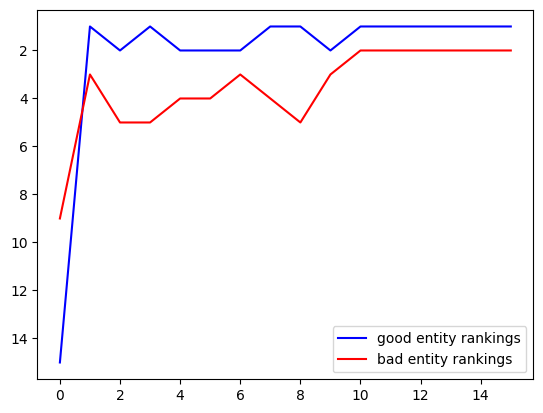

Mitigator AUC is: 27.0
Disinformer AUC is: 51.5


In [42]:

jackie_chan_mitigator_greedy_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_jackie_chan_random_greedy', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['jackie_chan_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="greedy", disinformer_strategy="random", num_attack_budget=15, num_experiments_random=1)

jackie_chan_mitigator_greedy_disinformer_random_experiment.run_experiment()


## Spielberg Directed Close Encounters of the Third Kind/A.I. Artificial Intelligence

In [14]:
good_fact = ['/m/06pj8', '/film/director/film', '/m/012mrr']
bad_fact = ['/m/06pj8', '/film/director/film', '/m/011xg5']

good_entity = '/m/012mrr'
bad_entity = '/m/011xg5'

In [15]:
# get reduced dataset

# reduced_dataset = extract_subgraph_of_kg(fb15k237_dataset, [good_fact, bad_fact], 5, save_path= 'spielberg_close_ai_reduced_dataset.txt')
    

In [16]:
reduced_dataset = "reduced_datasets/Steven Spielberg_Close Encounters of the Third Kind_A.I. Artificial Intelligence_reduced_dataset.txt"

### Disinformer Random, Mitigator Random

Try approximate greedy strategy

Good fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
Bad fact in question:
['/m/06pj8', '/film/director/film', '/m/011xg5']
Steven Spielberg /film/director/film A.I. Artificial Intelligence
	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1

	 saving model...
	 done.
Loading dataset <Kelpie.dataset.Dataset object at 0x15549c5de790>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/012mrr>
Extracting promising facts for</m/06pj8, /film/director/film, /m/012mrr>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 4 on 243: </m/0bxtg, /award/

	Analyzing sample 80 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/0drtkx>
	Analyzing sample 81 on 243: </m/06pj8, /award/award_winner/awards_won./award/award_honor/award_winner, /m/0k9j_>
	Analyzing sample 82 on 243: </m/0260bz, /film/film/produced_by, /m/06pj8>
	Analyzing sample 83 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06cs95>
	Analyzing sample 84 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
	Analyzing sample 85 on 243: </m/02wzl1d, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 86 on 243: </m/0322yj, /film/film/produced_by, /m/06pj8>
	Analyzing sample 87 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/0l76z>
	Analyzing sample 88 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /

	Analyzing sample 165 on 243: </m/0bxtg, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 166 on 243: </m/0260bz, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 167 on 243: </m/0bq2g, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/06pj8>
	Analyzing sample 168 on 243: </m/047csmy, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 169 on 243: </m/0872p_c, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 170 on 243: </m/03n0cd, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 171 on 243: </m/05m9f9, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 172 on 243: </m/07024, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 173 on 243: </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>
	Anal

		Running base post-training on entity /m/06pj8 with no additions
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
	Obtained relevance: 0.519204224670312

	Computing relevance for sample 1 on 13: </m/012mrr, /film/film/written_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/012mrr, /film/film/written_by, /m/06pj8>
	Obtained relevance: 0.5195734558174111

	Computing relevance for sample 2 on 13: </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.5182560553752915

	Computing relevance for sample 3 on 13: </m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity 

	Analyzing sample 75 on 243: </m/03wbzp, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 76 on 243: </m/06pj8, /award/award_winner/awards_won./award/award_honor/award_winner, /m/05mvd62>
	Analyzing sample 77 on 243: </m/065y4w7, /education/educational_institution/students_graduates./education/education/student, /m/06pj8>
	Analyzing sample 78 on 243: </m/09hy79, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 79 on 243: </m/092kgw, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 80 on 243: </m/09b0xs, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 81 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
	Analyzing sample 82 on 243: </m/02wzl1d, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 83 on 243: </m/0322

	Analyzing sample 163 on 243: </m/0m7yy, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>	Analyzing sample 164 on 243: </m/03qmx_f, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>

	Analyzing sample 165 on 243: </m/016y_f, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 166 on 243: </m/047csmy, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 167 on 243: </m/0872p_c, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 168 on 243: </m/0k9j_, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 169 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0180mw>
	Analyzing sample 170 on 243: </m/06pj8, /film/director/film, /m/0hx4y>
	Analyzing sample 171 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/0gq9h>
	Analyzing sample 172 on 243: </m/011xg5, /film/film/prod

	Analyzing sample 240 on 243: </m/025x1t, /tv/tv_program/program_creator, /m/06pj8>
	Analyzing sample 241 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0h1x5f>
	Analyzing sample 242 on 243: </m/0mbql, /film/film/edited_by, /m/06pj8>
	Analyzing sample 243 on 243: </m/03nqnk3, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>

	Computing relevance for sample 0 on 13: </m/011xg5, /film/film/written_by, /m/06pj8>
		Running base post-training on entity /m/06pj8 with no additions
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
	Obtained relevance: 0.5138352353768728

	Computing relevance for sample 1 on 13: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Ob

	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1


*****************

Good entity rankings [30, 6, 3, 2]
Bad entity rankings [2, 1, 1, 1]
Avg good entity rankings: [30, 6, 3, 2]
Avg bad entity rankings: [2, 1, 1, 1]


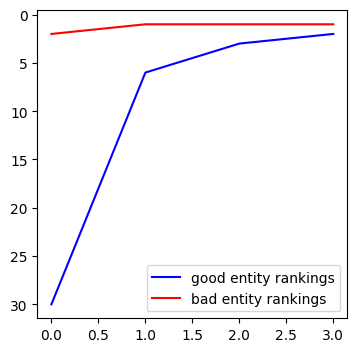

Mitigator AUC is: 25.0
Disinformer AUC is: 3.5


In [8]:

spielberg_close_ai_mitigator_random_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_approxgreedy', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=[reduced_dataset, test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="random", disinformer_strategy="approx_greedy", num_attack_budget=3, num_experiments_random=1)

spielberg_close_ai_mitigator_random_disinformer_random_experiment.run_experiment()


Try alternative neighbor strategy

In [ ]:

spielberg_close_ai_mitigator_random_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_altgreedy', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=[reduced_dataset, test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="random", disinformer_strategy="alt_neighbor", num_attack_budget=3, num_experiments_random=1)

spielberg_close_ai_mitigator_random_disinformer_random_experiment.run_experiment()


initialized strategies


Try without adding cost

Good fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
Bad fact in question:
['/m/06pj8', '/film/director/film', '/m/011xg5']
Steven Spielberg /film/director/film A.I. Artificial Intelligence
	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1

	 saving model...
	 done.
Loading dataset <Kelpie.dataset.Dataset object at 0x155432db3610>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/012mrr>
Extracting promising facts for</m/06pj8, /film/director/film, /m/012mrr>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 4 on 243: </m/04m_zp, /award

	Analyzing sample 82 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
	Analyzing sample 83 on 243: </m/092kgw, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 84 on 243: </m/09b0xs, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 85 on 243: </m/0415svh, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 86 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/025x1t>
	Analyzing sample 87 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/015g28>
	Analyzing sample 88 on 243: </m/06pj8, /film/actor/film./film/performance/film, /m/0jyb4>
	Analyzing sample 89 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0jqn5>
	Analyzing sample 90 on 243: </m/027c924, /award/award_categor

	Analyzing sample 161 on 243: </m/06pj8, /people/person/gender, /m/05zppz>
	Analyzing sample 162 on 243: </m/0bxtg, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 163 on 243: </m/0260bz, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 164 on 243: </m/0bt4g, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 165 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/0bwh6>
	Analyzing sample 166 on 243: </m/047csmy, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 167 on 243: </m/0872p_c, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 168 on 243: </m/02qjv1p, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 169 on 243: </m/0k9j_, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 170 on 243: </m/06pj8, /award/

	Analyzing sample 239 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0h1x5f>
	Analyzing sample 240 on 243: </m/06pj8, /film/director/film, /m/0jqn5>
	Analyzing sample 241 on 243: </m/06pj8, /people/person/place_of_birth, /m/01snm>
	Analyzing sample 242 on 243: </m/048z7l, /people/ethnicity/people, /m/06pj8>
	Analyzing sample 243 on 243: </m/025x1t, /tv/tv_program/program_creator, /m/06pj8>

	Computing relevance for sample 0 on 13: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
		Running base post-training on entity /m/06pj8 with no additions
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
	Obtained relevance: 0.519204224670312

	Computing relevance for sample 1 on 13: </m/012mrr, /film/film/written_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing sam

	Analyzing sample 40 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/03nqnk3>
	Analyzing sample 41 on 243: </m/072x7s, /film/film/produced_by, /m/06pj8>
	Analyzing sample 42 on 243: </m/06pj8, /film/actor/film./film/performance/film, /m/013q07>
	Analyzing sample 43 on 243: </m/06pj8, /film/director/film, /m/072x7s>
	Analyzing sample 44 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/015g28>
	Analyzing sample 45 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>
	Analyzing sample 46 on 243: </m/06pj8, /people/person/profession, /m/0dxtg>
	Analyzing sample 47 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/0drtkx>
	Analyzing sample 48 on 243: </m/02w_6xj, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 49 on 243: </m/06pj8, /film/actor/film./film/performance/film, /

	Analyzing sample 131 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/0f_nbyh>
	Analyzing sample 132 on 243: </m/06pj8, /film/director/film, /m/0jyb4>
	Analyzing sample 133 on 243: </m/06pj8, /film/director/film, /m/0k_9j>
	Analyzing sample 134 on 243: </m/02mjmr, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/06pj8>
	Analyzing sample 135 on 243: </m/06pj8, /film/director/film, /m/0295sy>
	Analyzing sample 136 on 243: </m/01flv_, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 137 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/09b0xs>
	Analyzing sample 138 on 243: </m/02ywhz, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 139 on 243: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 140 on 243: </m/0hn

	Analyzing sample 226 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0260bz>	Analyzing sample 227 on 243: </m/03nqnk3, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>

	Analyzing sample 228 on 243: </m/06pj8, /award/award_winner/awards_won./award/award_honor/award_winner, /m/09b0xs>
	Analyzing sample 229 on 243: </m/06pj8, /influence/influence_node/peers./influence/peer_relationship/peers, /m/0343h>
	Analyzing sample 230 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/03qmx_f>
	Analyzing sample 231 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/016dmx>
	Analyzing sample 232 on 243: </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/030_1_>
	Analyzing sample 233 on 243: </m/02z2xdf, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Ana

	 saving model...
	 done.
Good entity rank 8
Bad entity rank 1


*****************

Attack budget left for mitigator 2
Valid budget left: mitigator 2

Round number 2
Attack budget left for disinformer 2
Valid budget left: disinformer 2

Budget candidates: {(68, 21, 496), (496, 47, 68)}
disinformer wants to add the following sample to the dataset
Steven Spielberg /award/award_nominee/award_nominations./award/award_nomination/nominated_for A.I. Artificial Intelligence
Leftover cost is inf
Attack budget left for mitigator 2
Valid budget left: mitigator 2

Budget candidates: {(284, 8, 68), (284, 47, 68)}
mitigator wants to add the following sample to the dataset
Close Encounters of the Third Kind /film/film/written_by Steven Spielberg
Leftover cost is inf
Re-training model, dataset was modified
	 saving model...
	 done.
Good entity rank 3
Bad entity rank 1


*****************

Attack budget left for mitigator 1
Valid budget left: mitigator 1

Round number 3
Attack budget left for disinform

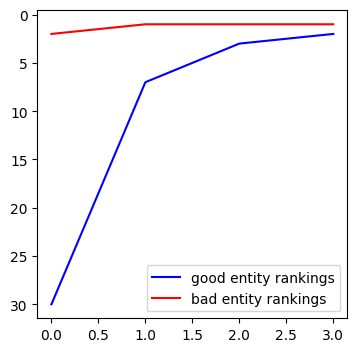

Mitigator AUC is: 26.0
Disinformer AUC is: 3.5


In [53]:

spielberg_close_ai_mitigator_random_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_random', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=[reduced_dataset, test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="random", disinformer_strategy="random", num_attack_budget=3, num_experiments_random=2)

spielberg_close_ai_mitigator_random_disinformer_random_experiment.run_experiment()


In [25]:
# read datasets of both epochs
datasets = []
for i in range(2):
    fn = f'epoch_{i}_dataset.txt'
    datasets.append(Dataset(name="FB15k-237", load=True, train_path=f"results/experiment_spielberg_close_ai_random_random/{fn}", test_path=test_path, valid_path=valid_path))
    
    

In [26]:
sets = []
for dataset in datasets:
    ds_set = set()
    for f in dataset.train_triples:
        ds_set.add(tuple(f))
    sets.append(ds_set)

In [27]:
sets[0] == sets[1]

True

Try with 15 facts

In [19]:

spielberg_close_ai_mitigator_random_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_random', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['spielberg_close_ai_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="random", disinformer_strategy="random", num_attack_budget=15, num_experiments_random=1)

spielberg_close_ai_mitigator_random_disinformer_random_experiment.run_experiment()


Fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
	 saving model...
	 done.

Removing (68, 10, 496)
Removing (68, 10, 284)
	 saving model...
	 done.

Loading dataset <Kelpie.dataset.Dataset object at 0x1554944e0820>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/012mrr>
Extracting promising facts for</m/06pj8, /film/director/film, /m/012mrr>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 4 on 243: </m/04m_zp, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 5 on 243: </m/0cc5qkt, /film/fil

	Analyzing sample 138 on 243: </m/02qjv1p, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 139 on 243: </m/0drnwh, /film/film/produced_by, /m/06pj8>	Analyzing sample 140 on 243: </m/036jb, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 141 on 243: </m/06pj8, /film/director/film, /m/0dnqr>
	Analyzing sample 142 on 243: </m/01flv_, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 143 on 243: </m/0hndn2q, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>



	Analyzing sample 144 on 243: </m/030h95, /people/person/spouse_s./people/marriage/spouse, /m/06pj8>	Analyzing sample 145 on 243: </m/033pf1, /film/film/produced_by, /m/06pj8>
	Analyzing sample 146 on 243: </m/03qmx_f, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>	Analyzing sample 147 on 243: </m/06pj8, /tv/



	Analyzing sample 217 on 243: </m/02qt02v, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 218 on 243: </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/0pzmf>

	Analyzing sample 219 on 243: </m/03ct7jd, /film/film/executive_produced_by, /m/06pj8>

	Analyzing sample 220 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/0415svh>	Analyzing sample 221 on 243: </m/02q_cc, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>	Analyzing sample 222 on 243: </m/02qjpv5, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>	Analyzing sample 223 on 243: </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/01snm>
	Analyzing sample 224 on 243: </m/06pj8, /influence/influence_node/peers./influence/peer_relationship/peers, /m/0343h>

	Analyzing sample 225 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_n

	Obtained relevance: 0.4999296665196289

	Computing relevance for sample 17 on 30: </m/025x1t, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/025x1t, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.4989566818120759

	Computing relevance for sample 18 on 30: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Obtained relevance: 0.5004658697687512

	Computing relevance for sample 19 on 30: </m/0bxtg, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/0bxtg, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	O

	Analyzing sample 39 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/025rvx0>
	Analyzing sample 40 on 243: </m/072x7s, /film/film/produced_by, /m/06pj8>
	Analyzing sample 41 on 243: </m/06pj8, /film/actor/film./film/performance/film, /m/013q07>
	Analyzing sample 42 on 243: </m/06pj8, /people/person/profession, /m/0dxtg>
	Analyzing sample 43 on 243: </m/012mrr, /film/film/written_by, /m/06pj8>
	Analyzing sample 44 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/0vhm>
	Analyzing sample 45 on 243: </m/0hx4y, /film/film/produced_by, /m/06pj8>
	Analyzing sample 46 on 243: </m/07r1h, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/06pj8>
	Analyzing sample 47 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
	Analyzing sample 48 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/

	Analyzing sample 141 on 243: </m/02w_6xj, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 142 on 243: </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>
	Analyzing sample 143 on 243: </m/06pj8, /film/actor/film./film/performance/film, /m/0k_9j>
	Analyzing sample 144 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/04dn09n>
	Analyzing sample 145 on 243: </m/04mlmx, /base/popstra/celebrity/dated./base/popstra/dated/participant, /m/06pj8>
	Analyzing sample 146 on 243: </m/0drnwh, /film/film/produced_by, /m/06pj8>
	Analyzing sample 147 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/015w8_>
	Analyzing sample 148 on 243: </m/06pj8, /film/director/film, /m/0dnqr>
	Analyzing sample 149 on 243: </m/08fn5b, /film/film/produced_by, /m/06pj8>
	Analyzing sample 150 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_

		Running base post-training on entity /m/06pj8 with no additions
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
	Obtained relevance: 0.5125853652434454

	Computing relevance for sample 1 on 30: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.5129649180812603

	Computing relevance for sample 2 on 30: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
	Obtained relevance: 0.5154486582334125

	Computing relevance for sample 3 on 30: </m/011xg5, /film/film/produced_by, /m/06pj8>
		Running post-tra

	Obtained relevance: 0.49969863895250777

	Computing relevance for sample 27 on 30: </m/0260bz, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/0260bz, /film/film/produced_by, /m/06pj8>
	Obtained relevance: 0.4993815425212156

	Computing relevance for sample 28 on 30: </m/0cc5qkt, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/0cc5qkt, /film/film/produced_by, /m/06pj8>
	Obtained relevance: 0.4980285269862187

	Computing relevance for sample 29 on 30: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
	Obtained relevance: 0.5008044235918339
*******************
explanations rule found: [([(68, 13, 686)], 0.5003893374609832), ([(68, 54, 397)], 0.5006432529715336), ([(27

	 saving model...
	 done.

Good entity rank 33
Bad entity rank 2
Attack budget left for mitigator 13
Valid budget left: mitigator 13
Round number 3
Attack budget left for disinformer 13
Valid budget left: disinformer 13
Budget candidates: {(272, 8, 68), (496, 47, 68), (68, 54, 397), (239, 66, 68), (68, 21, 496), (68, 21, 284), (68, 13, 10), (496, 8, 68), (80, 0, 68), (728, 66, 68), (68, 7, 23), (68, 57, 87), (68, 13, 686)}
disinformer wants to add the following sample to the dataset
Steven Spielberg /award/award_nominee/award_nominations./award/award_nomination/nominated_for A.I. Artificial Intelligence
Leftover cost is inf
Attack budget left for mitigator 13
Valid budget left: mitigator 13
Budget candidates: {(68, 21, 176), (68, 5, 690), (54, 14, 68), (391, 19, 68), (68, 21, 284), (7, 0, 68), (605, 18, 68), (45, 0, 68), (284, 8, 68), (68, 7, 23), (284, 47, 68), (415, 9, 68), (625, 9, 68)}
mitigator wants to add the following sample to the dataset
66th Academy Awards /award/award_cerem


KeyboardInterrupt



Try with adding cost for mitigator

Fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
	 saving model...
	 done.

Removing (68, 10, 496)
Removing (68, 10, 284)
	 saving model...
	 done.

Loading dataset <Kelpie.dataset.Dataset object at 0x155472a78fd0>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/012mrr>
Extracting promising facts for</m/06pj8, /film/director/film, /m/012mrr>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 4 on 243: </m/0bxtg, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 5 on 243: </m/0h21v2, /film/film/produced_by, /

	Analyzing sample 96 on 243: </m/0mbql, /film/film/story_by, /m/06pj8>
	Analyzing sample 97 on 243: </m/0mbql, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 98 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/01wd9lv>
	Analyzing sample 99 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/02qjv1p>
	Analyzing sample 100 on 243: </m/01f7kl, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 101 on 243: </m/03n0cd, /film/film/produced_by, /m/06pj8>
	Analyzing sample 102 on 243: </m/06pj8, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/02mjmr>
	Analyzing sample 103 on 243: </m/06pj8, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/0gx_p>
	Analyzing sample 104 on 243: </m/06pj8, /award/award_winner/awards_won./award/award_honor/award_winner, /m/02qjpv5>
	Analyzing sample 105 on 243: </m/06pj8, /award/award_win

	Analyzing sample 178 on 243: </m/06pj8, /film/director/film, /m/0295sy>
	Analyzing sample 179 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/03wbzp>
	Analyzing sample 180 on 243: </m/06pj8, /film/director/film, /m/0hx4y>
	Analyzing sample 181 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/0gq9h>
	Analyzing sample 182 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/072x7s>
	Analyzing sample 183 on 243: </m/0c3zjn7, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 184 on 243: </m/0jqn5, /film/film/produced_by, /m/06pj8>
	Analyzing sample 185 on 243: </m/0cc8l6d, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 186 on 243: </m/06pj8, /people/person/profession, /m/02hrh1q>
	Analyzing sample 187 on 243: </m/06pj8, /film/director/film, /m/0315rp>
	Analyzing sample 188 on 243: </m/0gy0l_, /

	Obtained relevance: 0.5016701159353208

	Computing relevance for sample 4 on 10: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
	Obtained relevance: 0.5009210099293936

	Computing relevance for sample 5 on 10: </m/040njc, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/040njc, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.4988086246149156

	Computing relevance for sample 6 on 10: </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.501997460229


	Obtained relevance: 0.517467897176336

	Current relevance 0.517467897176336
	Current averaged window relevance 0.5182690806195647
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9712949550542019
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>

	Obtained relevance: 0.5175063546780803

	Current relevance 0.5175063546780803
	Current averaged window relevance 0.5181228150501699
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9710208368114516
	Random value:0.223210738


	Obtained relevance: 0.5039724467797784

	Current relevance 0.5039724467797784
	Current averaged window relevance 0.5146975271600853
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9646014593651449
	Random value:0.6498844377795232
	Terminate:False

	Computing relevance for rule: </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>

	Obtained relevance: 0.503837986904915

	Current relevance 0.503837986904915
	Current averaged window relevance 0.5133596471259805
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9620941206559933
	Random value:0.5449


	Obtained relevance: 0.5503615840734927

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>

	Obtained relevance: 0.5356264936653777

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/0


	Obtained relevance: 0.5341967886865304

	Current relevance 0.5341967886865304
	Current averaged window relevance 0.5348884922985686
	Max relevance seen so far 0.5503615840734927
	Terminate threshold:0.9718855889969641
	Random value:0.09671637683346401
	Terminate:False

	Computing relevance for rule: </m/012mrr, /film/film/written_by, /m/06pj8> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>

	Obtained relevance: 0.5340892886902274

	Current relevance 0.5340892886902274
	Current averaged window relevance 0.53473504459


	Obtained relevance: 0.5523044997706283

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>

	Obtained relevance: 0.5514990736538427

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /f


	Obtained relevance: 0.5374026044542067

	Current relevance 0.5374026044542067
	Current averaged window relevance 0.5414475575191032
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9795942995972322
	Random value:0.6185197523642461
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/02g3ft, /award/award_category/winners.


	Obtained relevance: 0.5367191387369704

	Current relevance 0.5367191387369704
	Current averaged window relevance 0.5371061058397526
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9717396860561625
	Random value:0.23279088636103018
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_


	Obtained relevance: 0.5359564345336771

	Current relevance 0.5359564345336771
	Current averaged window relevance 0.5363624513394972
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9703942562002077
	Random value:0.936654587712494
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/02rdyk7, /award/award_category/winners./award/award_hono

	Analyzing sample 17 on 243: </m/04m_zp, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 18 on 243: </m/0cc5qkt, /film/film/produced_by, /m/06pj8>
	Analyzing sample 19 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
	Analyzing sample 20 on 243: </m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>
	Analyzing sample 21 on 243: </m/011xg5, /film/film/written_by, /m/06pj8>
	Analyzing sample 22 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/0js9s>
	Analyzing sample 23 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
	Analyzing sample 24 on 243: </m/0k2sk, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 25 on 243: </m/015g28, /film/film/produced_by, /m/06pj8>
	Analyzing sample 26 on 243: </m/06pj8, /people/person/places_lived./people

	Analyzing sample 120 on 243: </m/0hx4y, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 121 on 243: </m/05m9f9, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 122 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/025x1t>
	Analyzing sample 123 on 243: </m/02mjmr, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/06pj8>
	Analyzing sample 124 on 243: </m/06pj8, /film/director/film, /m/02rb84n>
	Analyzing sample 125 on 243: </m/06pj8, /film/director/film, /m/0k_9j>
	Analyzing sample 126 on 243: </m/0hndn2q, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 127 on 243: </m/06pj8, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/0bq2g>
	Analyzing sample 128 on 243: </m/031t2d, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 129 on 24

	Analyzing sample 204 on 243: </m/09p3h7, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>	Analyzing sample 205 on 243: </m/016dmx, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 206 on 243: </m/02qt02v, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 207 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/03qmx_f>

	Analyzing sample 208 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/02pqp12>
	Analyzing sample 209 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/016dmx>
	Analyzing sample 210 on 243: </m/06pj8, /film/director/film, /m/0jqn5>
	Analyzing sample 211 on 243: </m/06pj8, /people/person/place_of_birth, /m/01snm>
	Analyzing sample 212 on 243: </m/048z7l, /people/ethnicity/people, /m/06pj8>
	Analyzing sample 213 on 243


	Obtained relevance: 0.5286629313001567

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/011xg5, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/011xg5, /film/film/produced_by, /m/06pj8>

	Obtained relevance: 0.5267179382905736

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>

	Obtained relevance: 0.5260802822814932

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_w


	Obtained relevance: 0.5136274911781116

	Current relevance 0.5136274911781116
	Current averaged window relevance 0.5150452208109324
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9734645665674302
	Random value:0.8921795677048454
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/02_286>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /people/person/places_lived./people/place_lived/location, /m/02_286>

	Obtained relevance: 0.5132746488229952

	Current relevance 0.5132746488229952
	Current averaged window relevance 0.5146883238162601
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9727900110833876
	Random value:0.08693883262941615
	Terminate:False

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_w


	Obtained relevance: 0.5103701976822709

	Current relevance 0.5103701976822709
	Current averaged window relevance 0.5117527649405087
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9672416389538159
	Random value:0.006498759678061017
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v> + </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
			</m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>

	Obtained relevance: 0.5033020493139768

	Current relevance 0.5033020493139768
	Current averaged window relevance 0.5108079930250635
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9654559666555158
	Random value:0.8058192518328079
	Te


	Obtained relevance: 0.5002343654460928

	Current relevance 0.5002343654460928
	Current averaged window relevance 0.5011316263452554
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9471670869313707
	Random value:0.7297317866938179
	Terminate:False

	Computing relevance for rule: </m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>

	Obtained relevance: 0.4995880127885499

	Current relevance 0.4995880127885499
	Current averaged window relevance 0.5008966896563196
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9467230433157332
	Random value:0.5362280914547007
	Terminate:Fals


	Obtained relevance: 0.5289884791150833

	Current relevance 0.5289884791150833
	Current averaged window relevance 0.5329459594765101
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9820041682296808
	Random value:0.3785343772083535
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>

	Obtained relevance: 0.5288817876802848

	Current relevance 0.5288817876802848
	Current averaged window relevance 0.5317616209906634
	Max relevanc


	Obtained relevance: 0.5275085865465338

	Current relevance 0.5275085865465338
	Current averaged window relevance 0.5283301538195737
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9734991025391518
	Random value:0.0797919769236275
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/02_286>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /people/person/places_lived./people/place_lived/location, /m/02_286>

	Obtained relevance: 0.5267719044589088

	Current relevance 0.5267719044589088
	Current averaged window relevance 0.5281191654974361
	Max relevance seen so far 0.5427125227353001
	Terminat


	Obtained relevance: 0.5255661962786929

	Current relevance 0.5255661962786929
	Current averaged window relevance 0.5261795587901457
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9695364244373292
	Random value:0.6480353852465935
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>

	Obtained relevance: 0.5252075879505593

	Current relevance 0.5252075879505593
	Current averaged window relevance 0.5260231271393108
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9692481840811892
	Random value:0.6091310056669882
	T


	Obtained relevance: 0.5429536883362309

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>

	Obtained relevance: 0.5426860145961588

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0


	Obtained relevance: 0.540583777651277

	Current relevance 0.540583777651277
	Current averaged window relevance 0.5417993134695978
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9765751350843118
	Random value:0.7759999115462448
	Terminate:False

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/02q_cc, /award/award_nominee/award_nomin


	Obtained relevance: 0.537540466188242

	Current relevance 0.537540466188242
	Current averaged window relevance 0.5394032221575136
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9722562606623636
	Random value:0.65543866529488
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>

	Obtained relevance: 0.537382333673476

	Current releva


	Obtained relevance: 0.5310768519364768

	Current relevance 0.5310768519364768
	Current averaged window relevance 0.5334375409556134
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9615033198948546
	Random value:0.5845859902235405
	Terminate:False

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v> + </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /award/award_nominee/award_nominat

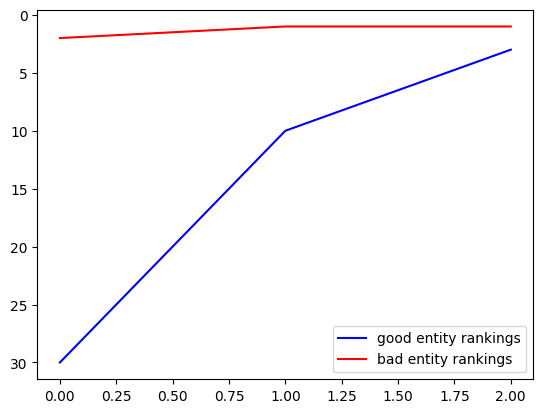

In [13]:

spielberg_close_ai_mitigator_random_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_random', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['spielberg_close_ai_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="random", disinformer_strategy="random", num_attack_budget=3, num_experiments_random=1, mitigator_max_cost=2, disinformer_max_cost=2)

spielberg_close_ai_mitigator_random_disinformer_random_experiment.run_experiment()


Try with greedy strategy for disinformer/mitigator

Fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
	 saving model...
	 done.

Removing (68, 10, 496)
Removing (68, 10, 284)
	 saving model...
	 done.

Loading dataset <Kelpie.dataset.Dataset object at 0x155472971640>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/012mrr>
Extracting promising facts for</m/06pj8, /film/director/film, /m/012mrr>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 4 on 243: </m/04m_zp, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 5 on 243: </m/0cc5qkt, /film/fil

	Analyzing sample 118 on 243: </m/06pj8, /people/person/spouse_s./people/marriage/type_of_union, /m/04ztj>	Analyzing sample 119 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/025x1t>
	Analyzing sample 120 on 243: </m/02mjmr, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/06pj8>
	Analyzing sample 121 on 243: </m/06pj8, /film/director/film, /m/02rb84n>
	Analyzing sample 122 on 243: </m/06pj8, /film/director/film, /m/0k_9j>
	Analyzing sample 123 on 243: </m/02ywhz, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 124 on 243: </m/0hndn2q, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 125 on 243: </m/06pj8, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/0bq2g>
	Analyzing sample 126 on 243: </m/0gq9h, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 12

	Analyzing sample 208 on 243: </m/030_3z, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>	Analyzing sample 209 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/06cs95>
	Analyzing sample 210 on 243: </m/02qjpv5, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>

	Analyzing sample 211 on 243: </m/06pj8, /award/award_winner/awards_won./award/award_honor/award_winner, /m/09b0xs>
	Analyzing sample 212 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/0415svh>
	Analyzing sample 213 on 243: </m/02g3gw, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 214 on 243: </m/02q_cc, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 215 on 243: </m/0bxtg, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 216 on 243: 


	Obtained relevance: 0.5320371757342418

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>

	Obtained relevance: 0.518969010372028

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/06pj8, /award/award_nominee/award_nominat


	Obtained relevance: 0.5169518562504195

	Current relevance 0.5169518562504195
	Current averaged window relevance 0.5176085137929431
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9700569780068222
	Random value:0.8921795677048454
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>

	Obtained relevance: 0.5166575037685686

	Current relevance 0.5166575037685686
	Current averaged window relevance 0.5174741715997688
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9698052055215234
	Random 


	Obtained relevance: 0.5036184156054825

	Current relevance 0.5036184156054825
	Current averaged window relevance 0.5094608166169429
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9547872707094124
	Random value:0.8094304566778266
	Terminate:False

	Computing relevance for rule: </m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>

	Obtained relevance: 0.5035342581530364

	Current relevance 0.5035342581530364
	Current averaged window relevance 0.5082302070602427
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9524809690241267
	Random value:0.


	Obtained relevance: 0.5351433860315697

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>

	Obtained relevance: 0.5353859563525751

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> +


	Obtained relevance: 0.5331106095935934

	Current relevance 0.5331106095935934
	Current averaged window relevance 0.5341709530650679
	Max relevance seen so far 0.5503615840734927
	Terminate threshold:0.9705818293337445
	Random value:0.7297317866938179
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>

	Obtained relevance: 0.532880469388647


	Obtained relevance: 0.5378749614709868

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>

	Obtained relevance: 0.537677610988102

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012


	Obtained relevance: 0.537010562304712

	Current relevance 0.537010562304712
	Current averaged window relevance 0.5375067794315479
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9724645901785861
	Random value:0.7045718362149235
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/02rdyk7, /award/award_category/winners./award/awa


	Obtained relevance: 0.5362993878616006

	Current relevance 0.5362993878616006
	Current averaged window relevance 0.5368003596317125
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9711865258500441
	Random value:0.6356844442644002
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominat


	Obtained relevance: 0.5359754093301576

	Current relevance 0.5359754093301576
	Current averaged window relevance 0.5361658247893932
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9700385167662469
	Random value:0.171138648198097
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/aw

	Analyzing sample 36 on 243: </m/040njc, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 37 on 243: </m/012mrr, /film/film/written_by, /m/06pj8>
	Analyzing sample 38 on 243: </m/06pj8, /film/actor/film./film/performance/film, /m/013q07>
	Analyzing sample 39 on 243: </m/06pj8, /people/person/profession, /m/01d_h8>
	Analyzing sample 40 on 243: </m/0343h, /influence/influence_node/peers./influence/peer_relationship/peers, /m/06pj8>
	Analyzing sample 41 on 243: </m/09gdh6k, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 42 on 243: </m/025x1t, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 43 on 243: </m/06pj8, /award/award_winner/awards_won./award/award_honor/award_winner, /m/0415svh>
	Analyzing sample 44 on 243: </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/027l4q>
	Analyzing sample 45 on 243: </m/08xvpn, /film/film/produced_by, /m/06pj8>
	Analyzing sample

	Analyzing sample 230 on 243: </m/0jqn5, /film/film/produced_by, /m/06pj8>
	Analyzing sample 231 on 243: </m/025x1t, /tv/tv_program/program_creator, /m/06pj8>
	Analyzing sample 232 on 243: </m/0cc8l6d, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 233 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/0f_nbyh>
	Analyzing sample 234 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/0415svh>
	Analyzing sample 235 on 243: </m/03nqnk3, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 236 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/025x1t>
	Analyzing sample 237 on 243: </m/02mjmr, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/06pj8>
	Analyzing sample 238 on 243: </m/0gy0l_, /film/film/produced_by, /m/06pj8>
	Analyzing sample 239 on 243: </m/06pj


	Obtained relevance: 0.5168436187697185

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/02_286>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /people/person/places_lived./people/place_lived/location, /m/02_286>

	Obtained relevance: 0.5161417638079699

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /organization/organization_founder/organizations_founded, /m/03


	Obtained relevance: 0.512749768468428

	Current relevance 0.512749768468428
	Current averaged window relevance 0.5138533701204524
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.971211901424757
	Random value:0.21863797480360336
	Terminate:False

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>

	Obtained relevance: 0.5125896540579737

	Current relevance 0.5125896540579737
	Current averaged window relevance 0.5136001025203984
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9707332113514389
	Random value:0.5053552881


	Obtained relevance: 0.50187658382468

	Current relevance 0.50187658382468
	Current averaged window relevance 0.5077132594625462
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9596067453748401
	Random value:0.15547949981178155
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>

	Obtained relevance: 0.5017785950981625

	Current relevance 0.5017785950981625
	Current averaged window relevance 0.5066687521110327
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9576325674674776
	Random value:0.95721307220


	Obtained relevance: 0.5427125227353001

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/011xg5, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/011xg5, /film/film/produced_by, /m/06pj8>

	Obtained relevance: 0.5407251725387535

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/011xg5, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8


	Obtained relevance: 0.5287584595493913

	Current relevance 0.5287584595493913
	Current averaged window relevance 0.5297333991058647
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9760847168883814
	Random value:0.6185197523642461
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>

	Obtained relevance: 0.5286211073258463

	Current relevance 0.5286211073258463
	Current averaged window relevance 0.5294711051668697
	Max relevance seen so far 0.5427125227


	Obtained relevance: 0.5265248912121795

	Current relevance 0.5265248912121795
	Current averaged window relevance 0.5276684415056685
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9722798339831765
	Random value:0.2779736031100921
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>

	Obtained relevance: 0.5263639333343305

	Current relevance 0.5263639333343305
	Current averaged window relevance 0.52744272410651


	Obtained relevance: 0.524071428684303

	Current relevance 0.524071428684303
	Current averaged window relevance 0.525412172275437
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9681224410067628
	Random value:0.1634024937619284
	Terminate:False

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>

	Obtained relevance: 0.5239708103956525

	Current relevance 0.5239708103956525
	Current averaged window relevance 0.5251772584828575
	Max relevance s


	Obtained relevance: 0.5426232934832017

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>

	Obtained relevance: 0.5424755976798328

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06


	Obtained relevance: 0.5402282484552134

	Current relevance 0.5402282484552134
	Current averaged window relevance 0.5413453850247605
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9757569442499663
	Random value:0.03210024390403776
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>

	Obtained relevance: 0.54013586573


	Obtained relevance: 0.5326530453114718

	Current relevance 0.5326530453114718
	Current averaged window relevance 0.5383057079397473
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.970278028005315
	Random value:0.9145475897405435
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v> + </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
			</m/06pj8, /people/person/employment_history./busine


	Obtained relevance: 0.5307913697446126

	Current relevance 0.5307913697446126
	Current averaged window relevance 0.5320926768959479
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9590792474235786
	Random value:0.39940050514039727
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v> + </m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
			</m/06pj8, /organization/organization_founder/organizations_fou

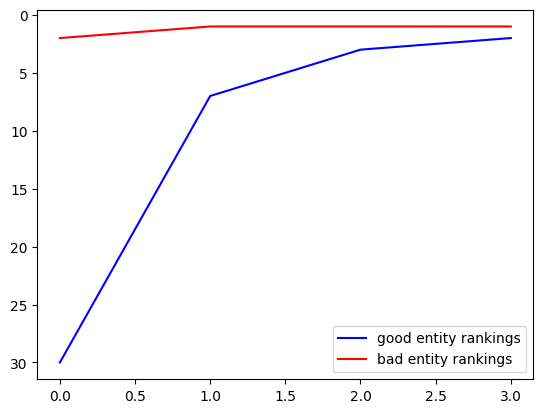

In [14]:

spielberg_close_ai_mitigator_random_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_random', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['spielberg_close_ai_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="greedy", disinformer_strategy="greedy", num_attack_budget=3, num_experiments_random=1, mitigator_max_cost=3, disinformer_max_cost=3)

spielberg_close_ai_mitigator_random_disinformer_random_experiment.run_experiment()


Try with greedy strategy for mitigator and disinformer but not enough cost

Fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
	 saving model...
	 done.

Removing (68, 10, 496)
Removing (68, 10, 284)
	 saving model...
	 done.

Loading dataset <Kelpie.dataset.Dataset object at 0x1554713a1490>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/012mrr>
Extracting promising facts for</m/06pj8, /film/director/film, /m/012mrr>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 4 on 243: </m/04m_zp, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 5 on 243: </m/02rb84n, /film/fil

	Analyzing sample 109 on 243: </m/06pj8, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/0gx_p>	Analyzing sample 110 on 243: </m/09hy79, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 111 on 243: </m/06pj8, /award/award_winner/awards_won./award/award_honor/award_winner, /m/0k9j_>
	Analyzing sample 112 on 243: </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 113 on 243: </m/06pj8, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/01vhrz>
	Analyzing sample 114 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/0l76z>
	Analyzing sample 115 on 243: </m/0260bz, /film/film/produced_by, /m/06pj8>
	Analyzing sample 116 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/06cs95>
	Analyzing sample 117 on 243: </m/06pj8, /film/director/film, /m/02rb84n>
	Analyzing sample 118 on 243: </m/

	Analyzing sample 233 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0260bz>
	Analyzing sample 234 on 243: </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/030_1_>
	Analyzing sample 235 on 243: </m/01flv_, /film/film/produced_by, /m/06pj8>
	Analyzing sample 236 on 243: </m/06pj8, /film/director/film, /m/07024>
	Analyzing sample 237 on 243: </m/011wtv, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 238 on 243: </m/02qt02v, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 239 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/016dmx>
	Analyzing sample 240 on 243: </m/06pj8, /film/director/film, /m/0jqn5>
	Analyzing sample 241 on 243: </m/06pj8, /people/person/place_of_birth, /m/01snm>
	Analyzing sample 242 on 243: </m/048z7l, /people/ethnicity/people, /m/06pj8>


	Obtained relevance: 0.5180009257003104

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>

	Obtained relevance: 0.5179534226811746

	Computing relevance for rule: </m/012mrr, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>

	Obtained relevance: 0.5179917584763142


	Obtained relevance: 0.515634921420626

	Current relevance 0.515634921420626
	Current averaged window relevance 0.5168829293902057
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.968697150658059
	Random value:0.21863797480360336
	Terminate:False

	Computing relevance for rule: </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>

	Obtained relevance: 0.5151344782744748

	Current relevance 0.5151344782744748
	Current averaged window relevance 0.5166254298664821
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9682145673867925
	Random value:0.5053552881


	Obtained relevance: 0.5027799319872926

	Current relevance 0.5027799319872926
	Current averaged window relevance 0.5045287945494931
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9455441027654493
	Random value:0.3402505165179919
	Terminate:False

	Computing relevance for rule: </m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>

	Obtained relevance: 0.5026235339672334

	Current relevance 0.5026235339672334
	Current averaged window relevance 0.5033587873583343
	Max relevance seen so far 0.5335856815921002
	Terminate threshold:0.9433513767768738
	Random value:0.15547949981178155
	Terminate:False




	Obtained relevance: 0.534644908310472

	Computing relevance for rule: </m/012mrr, /film/film/written_by, /m/06pj8> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>

	Obtained relevance: 0.5340958147185675

	Current relevance 0.5340958147185675
	Current averaged window relevance 0.5351914765221246
	Max relevance seen so far 0.5503615840734927
	Terminate threshold:0.9724361074784931
	Random value:0.33659454511262676
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/


	Obtained relevance: 0.5524106116866174

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>

	Obtained relevance: 0.5527263253182706

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> 


	Obtained relevance: 0.5374917470040463

	Current relevance 0.5374917470040463
	Current averaged window relevance 0.5459440397795635
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9877293965783126
	Random value:0.3785343772083535
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award


	Obtained relevance: 0.5370639121378512

	Current relevance 0.5370639121378512
	Current averaged window relevance 0.53738039203751
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9722359283829586
	Random value:0.22789827565154686
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc> + </m/02g3ft, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
			</m/02g3ft, /award/award_category/winners./award/award_honor


	Obtained relevance: 0.5361614754008248

	Current relevance 0.5361614754008248
	Current averaged window relevance 0.5366138448736519
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.9708490808080459
	Random value:0.37018096711688264
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc> + </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/aw


	Obtained relevance: 0.5355280509043359

	Current relevance 0.5355280509043359
	Current averaged window relevance 0.5360048183715104
	Max relevance seen so far 0.5527263253182706
	Terminate threshold:0.969747221760911
	Random value:0.1634024937619284
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr> + </m/012mrr, /film/film/written_by, /m/06pj8> + </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
			</m/012mrr, /film/film/written_by, /m/06pj8>
			</m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
			</m/06pj8

	Analyzing sample 61 on 243: </m/065y4w7, /education/educational_institution/students_graduates./education/education/student, /m/06pj8>
	Analyzing sample 62 on 243: </m/01q2nx, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 63 on 243: </m/06pj8, /film/actor/film./film/performance/film, /m/0jyb4>
	Analyzing sample 64 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0jqn5>
	Analyzing sample 65 on 243: </m/027c924, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 66 on 243: </m/034b6k, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 67 on 243: </m/06pj8, /influence/influence_node/influenced_by, /m/0j_c>
	Analyzing sample 68 on 243: </m/092kgw, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 69 on 243: </m/02w_6xj, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 70 on 24

	Analyzing sample 143 on 243: </m/06pj8, /film/director/film, /m/072x7s>
	Analyzing sample 144 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/015g28>
	Analyzing sample 145 on 243: </m/0dr3sl, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 146 on 243: </m/01wd9lv, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 147 on 243: </m/033pf1, /film/film/produced_by, /m/06pj8>
	Analyzing sample 148 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/072x7s>
	Analyzing sample 149 on 243: </m/0c3zjn7, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 150 on 243: </m/03qmx_f, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 151 on 243: </m/06pj8, /people/person/gender, /m/05zppz>
	Analyzing sample 152 on 243: </m/0bxtg, /award/award_nominee/award_nominations./award/award_no


	Computing relevance for sample 0 on 10: </m/011xg5, /film/film/written_by, /m/06pj8>
		Running base post-training on entity /m/06pj8 with no additions
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
	Obtained relevance: 0.5125853652434454

	Computing relevance for sample 1 on 10: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.5129649180812603

	Computing relevance for sample 2 on 10: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
	Obtained relevance: 0.5154486582334125

	Computing relevan


	Obtained relevance: 0.5152769207235042

	Current relevance 0.5152769207235042
	Current averaged window relevance 0.521063030731533
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9848385673140425
	Random value:0.6394267984578837
	Terminate:False

	Computing relevance for rule: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>

	Obtained relevance: 0.5151223300585133

	Current relevance 0.5151223300585133
	Current averaged window relevance 0.5197089706073686
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9822793171771311
	Random v


	Obtained relevance: 0.5124841010300422

	Current relevance 0.5124841010300422
	Current averaged window relevance 0.5133428777973952
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9702470420921755
	Random value:0.026535969683863625
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>

	Obtained relevance: 0.5123756876188835

	Current relevance 0.5123756876188835
	Current averaged window relevance 0.5131077795940395
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9698026932051592
	Random value:0.1988376506866485
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by,


	Obtained relevance: 0.5016105119321121

	Current relevance 0.5016105119321121
	Current averaged window relevance 0.5056189928980681
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9556484632452508
	Random value:0.33659454511262676
	Terminate:False

	Computing relevance for rule: </m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_> + </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /organization/organization_founder/organizations_founded, /m/030_1_>
			</m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>

	Obtained relevance: 0.5011241417063624

	Current relevance 0.5011241417063624
	Current averaged window relevance 0.5045876742748433
	Max relevance seen so far 0.5290847129927416
	Terminate threshold:0.9536992127794961
	Random value:0.09274584338014791
	Terminate:False

	Computin


	Obtained relevance: 0.5376701434403156

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>

	Obtained relevance: 0.5312440467157952

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /award/award_nominee/award_nominations./award/award


	Obtained relevance: 0.5286211073258463

	Current relevance 0.5286211073258463
	Current averaged window relevance 0.5294711051668697
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9756014150886126
	Random value:0.8617069003107772
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/02q_cc>

	Obtained relevance: 0.528484701347579

	Current relevance 0.528484701347579
	Current averaged window relevance 0.5292353555511268
	


	Obtained relevance: 0.5263639333343305

	Current relevance 0.5263639333343305
	Current averaged window relevance 0.5274427241065169
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.97186392797457
	Random value:0.6356844442644002
	Terminate:False

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>

	Obtained relevance: 0.5263199483214481

	Current relevance 0.5263199483214481
	Current averaged window relevance 0.5272262488039038
	Max relevance seen so far 0.54


	Obtained relevance: 0.5239708103956525

	Current relevance 0.5239708103956525
	Current averaged window relevance 0.5251772584828575
	Max relevance seen so far 0.5427125227353001
	Terminate threshold:0.9676895897591159
	Random value:0.3794554417576478
	Terminate:False

	Computing relevance for rule: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>

	Obtained relevance: 0.5238090558801495

	Current relevance 0.5238090558801495
	Current averaged window relevance 0.5249602411704875
	Max relevanc


	Obtained relevance: 0.5422074065831101

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/06pj8, /people/person/employment_history./business/employment_tenure/company, /m/01gb54>

	Obtained relevance: 0.5417782026578991

	Current relevance 0.5417782026578991
	Current averaged window relevance 0.5429952838576224
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9787308316941186
	Random value:0.6399997598540929
	Terminate:False

	Computi


	Obtained relevance: 0.5399799932466024

	Current relevance 0.5399799932466024
	Current averaged window relevance 0.5408470818062951
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9748587693708409
	Random value:0.26774087597570273
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8> + </m/011xg5, /film/film/produced_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
			</m/011xg5, /film/film/produced_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>

	Obtained relevance: 0.5399311926528638

	Current relevance 0.5399


	Obtained relevance: 0.531932700842931

	Current relevance 0.531932700842931
	Current averaged window relevance 0.5366893626350753
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9673646196730958
	Random value:0.26488016649805246
	Terminate:False

	Computing relevance for rule: </m/011xg5, /film/film/written_by, /m/06pj8> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5> + </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v> + </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/02_286>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/019f4v>
			</m/06pj8, /people/person/places_lived./people/place_lived/locati


	Obtained relevance: 0.5306723732856162

	Current relevance 0.5306723732856162
	Current averaged window relevance 0.5312311905154419
	Max relevance seen so far 0.5547953188699832
	Terminate threshold:0.9575264470462058
	Random value:0.9975376064951103
	Terminate:True
*******************
Best rule found: [(496, 47, 68), (496, 8, 68), (68, 21, 496), (496, 9, 68)]

Good entity explanations samples for 
Steven Spielberg /film/director/film Close Encounters of the Third Kind
Steven Spielberg /award/award_nominee/award_nominations./award/award_nomination/nominated_for Close Encounters of the Third Kind
Close Encounters of the Third Kind /award/award_winning_work/awards_won./award/award_honor/award_winner Steven Spielberg
Close Encounters of the Third Kind /film/film/written_by Steven Spielberg

Bad entity explanations samples for 
Steven Spielberg /film/director/film A.I. Artificial Intelligence
Steven Spielberg /award/award_nominee/award_nominations./award/award_nomination/nominated_for A.

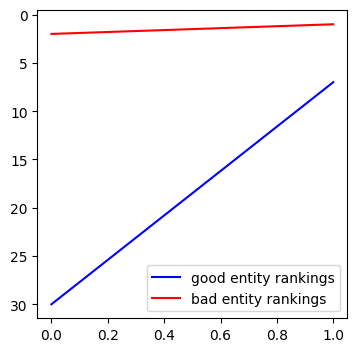

Mitigator AUC is: 18.5
Disinformer AUC is: 1.5


In [19]:

spielberg_close_ai_mitigator_random_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_random', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['reduced_datasets/Steven Spielberg_Close Encounters of the Third Kind_A.I. Artificial Intelligence_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="greedy", disinformer_strategy="greedy", num_attack_budget=3, num_experiments_random=1, mitigator_max_cost=1, disinformer_max_cost=1)

spielberg_close_ai_mitigator_random_disinformer_random_experiment.run_experiment()


Try with not enough cost and multiple rounds

Fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
	 saving model...
	 done.

Removing (68, 10, 496)
Removing (68, 10, 284)
	 saving model...
	 done.

Loading dataset <Kelpie.dataset.Dataset object at 0x15544339a1c0>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/012mrr>
Extracting promising facts for</m/06pj8, /film/director/film, /m/012mrr>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 4 on 243: </m/04m_zp, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 5 on 243: </m/0cc5qkt, /film/fil

	Analyzing sample 176 on 243: </m/065y4w7, /education/educational_institution/students_graduates./education/education/student, /m/06pj8>
	Analyzing sample 177 on 243: </m/06pj8, /film/director/film, /m/02mmwk>
	Analyzing sample 178 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0gy0l_>
	Analyzing sample 179 on 243: </m/06pj8, /film/actor/film./film/performance/film, /m/016dj8>
	Analyzing sample 180 on 243: </m/092kgw, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 181 on 243: </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
	Analyzing sample 182 on 243: </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/0pzmf>
	Analyzing sample 183 on 243: </m/06pj8, /influence/influence_node/peers./influence/peer_relationship/peers, /m/0343h>
	Analyzing sample 184 on 243: </m/02z2xdf, /award/award_nominee/award

	Obtained relevance: 0.515458662248137

	Computing relevance for sample 3 on 30: </m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/02rdyk7, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.5016701159353208

	Computing relevance for sample 4 on 30: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/040njc>
	Obtained relevance: 0.5009210099293936

	Computing relevance for sample 5 on 30: </m/040njc, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/040njc, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.49880862461

Loading dataset <Kelpie.dataset.Dataset object at 0x15544339a1c0>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/011xg5>
Extracting promising facts for</m/06pj8, /film/director/film, /m/011xg5>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/02rb84n, /film/film/produced_by, /m/06pj8>
	Analyzing sample 4 on 243: </m/0bt4g, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 5 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 6 on 243: </m/04m_zp, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 7 on 243: </m/0cc5qkt, /film/film/produced_by, /m/06pj8>
	Analyzing sample 8 

	Analyzing sample 140 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/0cc8l6d>
	Analyzing sample 141 on 243: </m/02qjv1p, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 142 on 243: </m/09gdh6k, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 143 on 243: </m/025x1t, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 144 on 243: </m/06pj8, /film/director/film, /m/0dnqr>
	Analyzing sample 145 on 243: </m/08fn5b, /film/film/produced_by, /m/06pj8>
	Analyzing sample 146 on 243: </m/033pf1, /film/film/produced_by, /m/06pj8>
	Analyzing sample 147 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/072x7s>
	Analyzing sample 148 on 243: </m/0c3zjn7, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 149 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program,


	Computing relevance for sample 0 on 30: </m/011xg5, /film/film/written_by, /m/06pj8>
		Running base post-training on entity /m/06pj8 with no additions
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /film/film/written_by, /m/06pj8>
	Obtained relevance: 0.5125853652434454

	Computing relevance for sample 1 on 30: </m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/011xg5, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Obtained relevance: 0.5129649180812603

	Computing relevance for sample 2 on 30: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011xg5>
	Obtained relevance: 0.5154486582334125

	Computing relevan

	Obtained relevance: 0.49969863895250777

	Computing relevance for sample 27 on 30: </m/0260bz, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/0260bz, /film/film/produced_by, /m/06pj8>
	Obtained relevance: 0.4993815425212156

	Computing relevance for sample 28 on 30: </m/0cc5qkt, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/0cc5qkt, /film/film/produced_by, /m/06pj8>
	Obtained relevance: 0.4980285269862187

	Computing relevance for sample 29 on 30: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/012mrr>
	Obtained relevance: 0.5008044235918339
*******************
explanations rule found: [([(496, 47, 68)], 0.5125853652434454), ([(496, 8, 68)], 0.5129649180812603), ([(68,

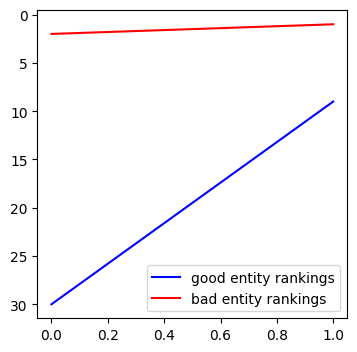

Mitigator AUC is: 19.5
Disinformer AUC is: 1.5


In [23]:

spielberg_close_ai_mitigator_random_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_random', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['reduced_datasets/Steven Spielberg_Close Encounters of the Third Kind_A.I. Artificial Intelligence_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="greedy", disinformer_strategy="greedy", num_attack_budget=3, mitigator_max_cost=1, disinformer_max_cost=1, num_experiments_random=2)

spielberg_close_ai_mitigator_random_disinformer_random_experiment.run_experiment()


### Disinformer Random, Mitigator Greedy

In [ ]:

spielberg_close_ai_mitigator_random_disinformer_greedy_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_greedy_random', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['spielberg_close_ai_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="greedy", disinformer_strategy="random", num_attack_budget=3, num_experiments_random=1)
spielberg_close_ai_mitigator_random_disinformer_greedy_experiment.run_experiment()


Fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
	 saving model...
	 done.

Removing (68, 10, 496)
Removing (68, 10, 284)


### Disinformer Greedy, Mitigator Random

In [ ]:

spielberg_close_ai_mitigator_greedy_disinformer_random_experiment = KnowledgeGraphMitigationExperiment('experiment_spielberg_close_ai_random_greedy', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=['spielberg_close_ai_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="random", disinformer_strategy="greedy", num_attack_budget=15, num_experiments_random=1)

spielberg_close_ai_mitigator_greedy_disinformer_random_experiment.run_experiment()


## Spielberg Directed Close Encounters of the Third Kind / Empires of the Sun

In [3]:
good_fact = ['/m/06pj8', '/film/director/film', '/m/012mrr']
bad_fact = ['/m/06pj8', '/film/director/film', '/m/025rvx0']
good_entity = '/m/012mrr'
bad_entity = '/m/025rvx0'

exp_name = 'Steven Spielberg_Close Encounters of the Third Kind_Empire of the Sun'

Test neighbor strategy

Fact in question:
['/m/06pj8', '/film/director/film', '/m/012mrr']
Steven Spielberg /film/director/film Close Encounters of the Third Kind
	 saving model...
	 done.

	 saving model...
	 done.

Loading dataset <Kelpie.dataset.Dataset object at 0x1553d1214f70>...
Explaining fact 0 on 1: </m/06pj8,/film/director/film,/m/012mrr>
Extracting promising facts for</m/06pj8, /film/director/film, /m/012mrr>
	Analyzing sample 1 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/07z2lx>
	Analyzing sample 2 on 243: </m/02q_cc, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 3 on 243: </m/09b0xs, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 4 on 243: </m/04m_zp, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 5 on 243: </m/09q_6t, /award/award_ceremony/awards_presented./award/award_hono

	Analyzing sample 90 on 243: </m/02wzl1d, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 91 on 243: </m/0322yj, /film/film/produced_by, /m/06pj8>
	Analyzing sample 92 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/0l76z>
	Analyzing sample 93 on 243: </m/021w0_, /education/educational_institution/students_graduates./education/education/student, /m/06pj8>
	Analyzing sample 94 on 243: </m/06pj8, /film/director/film, /m/0cc5qkt>
	Analyzing sample 95 on 243: </m/09b0xs, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 96 on 243: </m/06pj8, /award/award_winner/awards_won./award/award_honor/award_winner, /m/016dmx>
	Analyzing sample 97 on 243: </m/0415svh, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 98 on 243: </m/06pj8, /film/director/film, /m/072x7s>
	Analyzing sample 99 on 243: </m/06pj8, /tv/tv_producer/progr

	Analyzing sample 186 on 243: </m/06pj8, /film/actor/film./film/performance/film, /m/0k_9j>
	Analyzing sample 187 on 243: </m/01s7w3, /film/film/produced_by, /m/06pj8>
	Analyzing sample 188 on 243: </m/016dmx, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 189 on 243: </m/06pj8, /film/director/film, /m/0dnqr>
	Analyzing sample 190 on 243: </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
	Analyzing sample 191 on 243: </m/06pj8, /people/person/places_lived./people/place_lived/location, /m/0pzmf>
	Analyzing sample 192 on 243: </m/06pj8, /influence/influence_node/peers./influence/peer_relationship/peers, /m/0343h>
	Analyzing sample 193 on 243: </m/02z2xdf, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/06pj8>
	Analyzing sample 194 on 243: </m/025rvx0, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 195 

	Obtained relevance: 0.5025467652371495

	Computing relevance for sample 7 on 30: </m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
	Obtained relevance: 0.5015582987876327

	Computing relevance for sample 8 on 30: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/030_3z>
	Obtained relevance: 0.49863291127410736

	Computing relevance for sample 9 on 30: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/011wtv>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/06pj8, /award/award_nominee/award_

	Analyzing sample 32 on 243: </m/040njc, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 33 on 243: </m/073h1t, /award/award_ceremony/awards_presented./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 34 on 243: </m/06pj8, /base/popstra/celebrity/dated./base/popstra/dated/participant, /m/04mlmx>
	Analyzing sample 35 on 243: </m/0468g4r, /award/award_category/winners./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 36 on 243: </m/06jrhz, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 37 on 243: </m/06pj8, /people/person/profession, /m/01d_h8>
	Analyzing sample 38 on 243: </m/0hx4y, /film/film/produced_by, /m/06pj8>
	Analyzing sample 39 on 243: </m/07r1h, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/06pj8>
	Analyzing sample 40 on 243: </m/0343h, /influence/influence_node/peers./influence/peer_relationship/peers, /m/06pj8>
	Analyzing sample 41 on 24

	Analyzing sample 128 on 243: </m/06pj8, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/0l76z>
	Analyzing sample 129 on 243: </m/06pj8, /film/director/film, /m/03h3x5>
	Analyzing sample 130 on 243: </m/09gb9xh, /award/award_winner/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 131 on 243: </m/06pj8, /film/director/film, /m/011xg5>
	Analyzing sample 132 on 243: </m/06pj8, /celebrities/celebrity/celebrity_friends./celebrities/friendship/friend, /m/0bq2g>
	Analyzing sample 133 on 243: </m/06pj8, /film/director/film, /m/01flv_>
	Analyzing sample 134 on 243: </m/031t2d, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 135 on 243: </m/030h95, /people/person/spouse_s./people/marriage/spouse, /m/06pj8>
	Analyzing sample 136 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award, /m/0cc8l6d>
	Analyzing sample 137 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nomin

	Analyzing sample 230 on 243: </m/03t79f, /film/film/executive_produced_by, /m/06pj8>
	Analyzing sample 231 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/04vr_f>
	Analyzing sample 232 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/016dmx>
	Analyzing sample 233 on 243: </m/06pj8, /film/director/film, /m/0jqn5>
	Analyzing sample 234 on 243: </m/06pj8, /film/director/film, /m/0jyb4>
	Analyzing sample 235 on 243: </m/06pj8, /people/person/place_of_birth, /m/01snm>
	Analyzing sample 236 on 243: </m/048z7l, /people/ethnicity/people, /m/06pj8>
	Analyzing sample 237 on 243: </m/025x1t, /tv/tv_program/program_creator, /m/06pj8>
	Analyzing sample 238 on 243: </m/011wtv, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/06pj8>
	Analyzing sample 239 on 243: </m/06pj8, /award/award_nominee/award_nominations./award/award_nomination/nominated_for, /m/0h1x5f>
	Analyzing sam

	Obtained relevance: 0.49868440931652547

	Computing relevance for sample 21 on 30: </m/01f7jt, /film/film/executive_produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/01f7jt, /film/film/executive_produced_by, /m/06pj8>
	Obtained relevance: 0.4986019170958227

	Computing relevance for sample 22 on 30: </m/08xvpn, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/08xvpn, /film/film/produced_by, /m/06pj8>
	Obtained relevance: 0.5048845644521662

	Computing relevance for sample 23 on 30: </m/0260bz, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/0260bz, /film/film/produced_by, /m/06pj8>
	Obtained relevance: 0.4991161832477757

	Computing relevance for sample 24 on 30: </m/0cc5qkt, /film/film/produced_by, /m/06pj8>
		Running post-training on entity /m/06pj8 removing samples: 
			</m/0cc5qkt, /film/film/produced_by, /m/06pj8>
	Obtained relevan

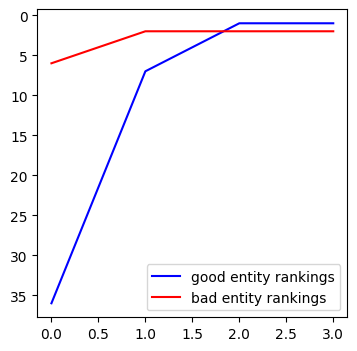

Mitigator AUC is: 26.5
Disinformer AUC is: 8.0


In [36]:

spielberg_close_empires_mitigator_greedy_random = KnowledgeGraphMitigationExperiment(f'{exp_name}_neighbor_random', 'FB15k-237', label_map_path, good_fact, good_entity, bad_entity, og_train_test_valid_paths=[f'reduced_datasets/{exp_name}_reduced_dataset.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", mitigator_strategy="neighbor", disinformer_strategy="random", num_attack_budget=3, num_experiments_random=1)

spielberg_close_empires_mitigator_greedy_random.run_experiment()


Questions and concerns:
- Issue with choosing a fact already in the KG: The LP model filters out all samples that already exist in the training set when it's making its prediction rankings. Therefore, if we have two samples: (h1, r1, t1) and (h1, r1, t2), and we run model.predict((h1, r1, t1)), we will not find t2 anywhere in the list of predictions because it will be filtered out.
- Kelpie doesn't allow you to choose how many explanations to generate, so the budget for the mitigator and disinformer might be different. One potential solution is to get the explanations, remove them from the dataset, and then get another set of explanations until we reach the required attack budget.
- So far for the KG experiments, we've been assuming that in each round, only one agent (either disinformer or mitigator) can add a fact. Should we change the assumption so that both agents add a fact in each round (similarly to what Miro is doing)? This could also potentially make the experiments run faster

In [ ]:
bad_fact = [fact_in_question[0], fact_in_question[1], bad_entity]
res = get_good_bad_fact_ranking(fact_in_question, bad_fact, reduced_dataset)

Good entity explanations samples for 
Bryan Singer /film/director/film Superman Returns

- Superman Returns /award/award_winning_work/awards_won./award/award_honor/award_winner Bryan Singer
- Superman Returns /film/film/produced_by Bryan Singer
- Superman Returns /film/film/story_by Bryan Singer


Bad entity explanations samples for 
Bryan Singer /film/director/film Valkyrie

- Valkyrie /film/film/produced_by Bryan Singer
- Bryan Singer /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency United States dollar
- dyslexia /medicine/disease/notable_people_with_this_condition Bryan Singer

### Mitigator Random, Disinformer Random

### Disinformer Greedy, Mitigator random

Fact in question:
('/m/07nznf', '/film/director/film', '/m/044g_k')
Bryan Singer /film/director/film Superman Returns


train loss: 100%|██████████| 27210/27210 [00:00<00:00, 63107.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Loading dataset <Kelpie.dataset.Dataset object at 0x155442ddc1c0>...
Explaining fact 0 on 1: </m/07nznf,/film/director/film,/m/044g_k>
Extracting promising facts for</m/07nznf, /film/director/film, /m/044g_k>
	Analyzing sample 1 on 41: </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr>
	Analyzing sample 2 on 41: </m/07nznf, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/08xwck>
	Analyzing sample 3 on 41: </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
	Analyzing sample 4 on 41: </m/044g_k, /film/film/produced_by, /m/07nznf>
	Analyzing sample 5 on 41: </m/0d90m, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
	Analyzing sample 6 on 41: </m/02qhlwd, /film/film/produced_by, /m/07nznf>
	Analyzing sample 7 on 41: </m/0cd2vh9, /film/film/story_by, /m/07nznf>
	Analyzing sample 8 on 41: </m/02g3ft, /award/award_category/winners./award/awar


	Obtained relevance: 0.5905806783701916

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/044g_k, /film/film/produced_by, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/044g_k, /film/film/produced_by, /m/07nznf>

	Obtained relevance: 0.5768762850681182

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/044g_k, /film/film/story_by, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/044g_k, /film/film/story_by, /m/07nznf>

	Obtained relevance: 0.5717028534052278

	Computing relevance for rule: </m/044g_k, /film/film/produced_by, /m/07nznf> + </m/044g_k, /film/film/story_by, /m/


	Obtained relevance: 0.5357436725130689

	Current relevance 0.5357436725130689
	Current averaged window relevance 0.5426904604658608
	Max relevance seen so far 0.602183364880072
	Terminate threshold:0.9012046697336791
	Random value:0.4219218196852704
	Terminate:False

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /people/person/gender, /m/05zppz>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/07nznf, /people/person/gender, /m/05zppz>

	Obtained relevance: 0.5342228919594877

	Current relevance 0.5342228919594877
	Current averaged window relevance 0.5404195541392196
	Max relevance seen so far 0.602183364880072
	Terminate threshold:0.8974335487444876
	Random value:0.029797219438070344
	Terminate:False

	Computing relevance for rule: </m/044g_k, /film/film/produced_by, /m/07nznf> 


	Obtained relevance: 0.5048104232435955

	Current relevance 0.5048104232435955
	Current averaged window relevance 0.5234164917943431
	Max relevance seen so far 0.602183364880072
	Terminate threshold:0.8691978595233768
	Random value:0.6981393949882269
	Terminate:False

	Computing relevance for rule: </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr> + </m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr>
			</m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>

	Obtained relevance: 0.5046700073229436

	Current relevance 0.5046700073229436
	Current averaged window relevance 0.5206685442157077
	Max relevance seen so far 0.602183364880072
	Terminate threshold:0.8646345524994727
	Random value:0.3402505165179919
	Terminate


	Obtained relevance: 0.6007468415348681

	Current relevance 0.6007468415348681
	Current averaged window relevance 0.6126799770289137
	Max relevance seen so far 0.6500473704169172
	Terminate threshold:0.9425158917817984
	Random value:0.33659454511262676
	Terminate:False

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/07nznf, /people/person/gender, /m/05zppz>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/07nznf, /film/director/film, /m/044g_k>
			</m/07nznf, /people/person/gender, /m/05zppz>

	Obtained relevance: 0.598615390207252

	Current relevance 0.598615390207252
	Current averaged window relevance 0.6082277800864295
	Max relevance seen so far 0.6500473704169172
	Terminate threshold:0.9356668571650923
	Random value:0.09274584338014791
	Te


	Obtained relevance: 0.6578598351840493

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/044g_k, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/044g_k, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /film/director/film, /m/044g_k>
			</m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>

	Obtained relevance: 0.6539446688169565

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/044g_k, /film/film/story_by, /m/07nznf


	Obtained relevance: 0.6406615425338635

	Current relevance 0.6406615425338635
	Current averaged window relevance 0.6455592431690312
	Max relevance seen so far 0.6986847370328871
	Terminate threshold:0.9239635689059639
	Random value:0.577352145256762
	Terminate:False

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/044g_k, /film/film/story_by, /m/07nznf> + </m/0d90m, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/07nznf, /film/director/film, /m/044g_k>
			</m/044g_k, /film/film/story_by, /m/07nznf>
			</m/0d90m, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>

	Obtained relevance: 0.6381337286391947

	Current relevance 0.638133728


	Obtained relevance: 0.6130399760101278

	Current relevance 0.6130399760101278
	Current averaged window relevance 0.6231864973078067
	Max relevance seen so far 0.6986847370328871
	Terminate threshold:0.891942337189589
	Random value:0.36483217897008424
	Terminate:False

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/07nznf, /people/person/nationality, /m/09c7w0> + </m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/07nznf, /film/director/film, /m/044g_k>
			</m/07nznf, /people/person/nationality, /m/09c7w0>
			</m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>

	Obtained relevanc

		Running base post-training on entity /m/07nznf with no additions
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
	Obtained relevance: 0.5497536917373355

	Computing relevance for sample 1 on 10: </m/07nznf, /film/director/film, /m/02qhlwd>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /film/director/film, /m/02qhlwd>
	Obtained relevance: 0.5815187095698973

	Computing relevance for sample 2 on 10: </m/07nznf, /people/person/nationality, /m/09c7w0>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /people/person/nationality, /m/09c7w0>
	Obtained relevance: 0.5007414812374555

	Computing relevance for sample 3 on 10: </m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit


	Obtained relevance: 0.5501082252632858

	Current relevance 0.5501082252632858
	Current averaged window relevance 0.5684791783893531
	Max relevance seen so far 0.6458115081571868
	Terminate threshold:0.8802555718022117
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /people/person/gender, /m/05zppz>
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /people/person/gender, /m/05zppz>

	Obtained relevance: 0.5479637374380948

	Current relevance 0.5479637374380948
	Current averaged window relevance 0.5649401491555196
	Max relevance seen so far 0.6458115081571868
	Terminate threshold:0.8747755994122304
	Random value:0.22321073814882275
	Terminate:False

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr


	Obtained relevance: 0.5933541128747514

	Current relevance 0.5933541128747514
	Current averaged window relevance 0.6299981402119444
	Max relevance seen so far 0.6580536407326859
	Terminate threshold:0.9573659367806185
	Random value:0.08693883262941615
	Terminate:False

	Computing relevance for rule: </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /people/person/gender, /m/05zppz> + </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/07nznf, /people/person/gender, /m/05zppz>
			</m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>

	Obtained relevance: 0.5902891759935343

	Current relevance 0.5902891759935343
	Current averaged window relevance 0.6239637893174421
	Max relevance seen so far 0.6580536407326859
	Terminate threshold:0.9481959382865998
	Random value:0.4219218196852704
	Terminate:False

	Computing relev


	Obtained relevance: 0.579653478377515

	Current relevance 0.579653478377515
	Current averaged window relevance 0.5841845606069974
	Max relevance seen so far 0.6580536407326859
	Terminate threshold:0.88774611133001
	Random value:0.8094304566778266
	Terminate:False

	Computing relevance for rule: </m/07nznf, /film/director/film, /m/02qhlwd> + </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf> + </m/044g_k, /film/film/produced_by, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
			</m/044g_k, /film/film/produced_by, /m/07nznf>

	Obtained relevance: 0.5812432038776867

	Current relevance 0.5812432038776867
	Current averaged window relevance 0.583519122079095
	Max relevance seen so far 0.6580536407326859
	Terminate threshold:0.8867348890120823
	Random value:0.006498759678061017
	Terminate:False

	Computing relevan


	Obtained relevance: 0.6551518201421955

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/02qhlwd> + </m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf> + </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>
			</m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>

	Obtained relevance: 0.6558919847495145

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /people/person/nationality, /m/09c7w0> + </m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/cu


	Obtained relevance: 0.6481936882593865

	Current relevance 0.6481936882593865
	Current averaged window relevance 0.6496377611389508
	Max relevance seen so far 0.6638439054053277
	Terminate threshold:0.9786001736994137
	Random value:0.8071282732743802
	Terminate:False

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /people/person/nationality, /m/09c7w0> + </m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/07nznf, /people/person/nationality, /m/09c7w0>
			</m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>

	Obtained relevance: 0.6457070109347374

	Current relevance 0.6457070109347374
	Current averaged window relevance 0.6489068337539476
	Ma


	Obtained relevance: 0.6376999999548123

	Current relevance 0.6376999999548123
	Current averaged window relevance 0.6425683901582847
	Max relevance seen so far 0.6638439054053277
	Terminate threshold:0.9679510272312395
	Random value:0.7045718362149235
	Terminate:False

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr> + </m/044g_k, /film/film/produced_by, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr>
			</m/044g_k, /film/film/produced_by, /m/07nznf>

	Obtained relevance: 0.6348869273978588

	Current relevance 0.6348869273978588
	Current averaged window relevance 0.6414863818045969
	Max relevance seen so far 0.


	Obtained relevance: 0.5915343029487817

	Current relevance 0.5915343029487817
	Current averaged window relevance 0.6069026213020605
	Max relevance seen so far 0.6638439054053277
	Terminate threshold:0.9142248898579552
	Random value:0.36483217897008424
	Terminate:False

	Computing relevance for rule: </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /people/person/nationality, /m/09c7w0> + </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr> + </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/07nznf, /people/person/nationality, /m/09c7w0>
			</m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr>
			</m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>

	Obtained relevance: 0.5897170567269048

	Current relevance 0.5897170567269048
	Current averaged 

train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63070.08ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 3
Bad entity rank 5
Good entity explanations samples for 
Bryan Singer /film/director/film Superman Returns
Superman Returns /award/award_winning_work/awards_won./award/award_honor/award_winner Bryan Singer
Superman Returns /film/film/produced_by Bryan Singer
Superman Returns /film/film/story_by Bryan Singer
Bad entity explanations samples for 
Bryan Singer /film/director/film Valkyrie
Valkyrie /film/film/produced_by Bryan Singer
Bryan Singer /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency United States dollar
dyslexia /medicine/disease/notable_people_with_this_condition Bryan Singer
Number of rounds for this simulation 6
Turns: ['good_entity', 'bad_entity', 'good_entity', 'bad_entity', 'good_entity', 'bad_entity']

Round number 1
mitigator adds the following sample to  the dataset
Superman Returns /film/film/story_by Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63061.81ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 3


Round number 2


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63035.99ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63062.83ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63055.16ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Valkyrie /film/film/produced_by Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63036.27ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 2
Bad entity rank 1


Round number 3
mitigator adds the following sample to  the dataset
Superman Returns /award/award_winning_work/awards_won./award/award_honor/award_winner Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27200/27200 [00:00<00:00, 63063.00ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2


Round number 4


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63067.22ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63096.34ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
Bryan Singer /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency United States dollar

Re-training model, dataset was modified


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63073.60ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2


Round number 5
mitigator adds the following sample to  the dataset
Superman Returns /film/film/produced_by Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63057.36ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2


Round number 6


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63082.67ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
disinformer adds the following sample to  the dataset
dyslexia /medicine/disease/notable_people_with_this_condition Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63071.40ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2


Remaining budget for disinformer
[]

Remaining budget for mitigator
[]

0 -1
1 0
2 1
3 2
4 3
5 4
6 5
7 6
Good entity rankings [3, 2, 2, 1, 1, 1, 1]
Bad entity rankings [5, 3, 1, 2, 2, 2, 2]


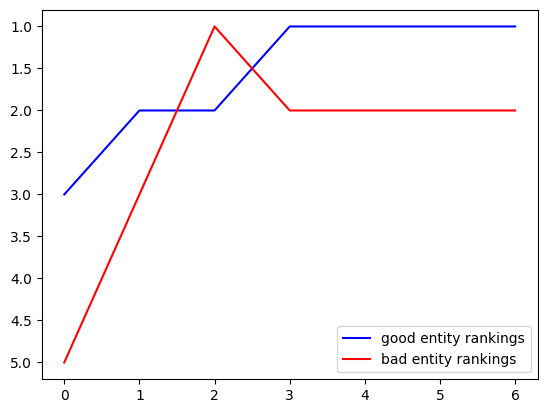

Mitigator AUC is: 9.0
Disinformer AUC is: 13.5
Total time taken for entire experiment 854.052591085434


In [18]:

experiment = KnowledgeGraphMitigationExperiment('experiment_reem_greedy_random', 'FB15k-237', label_map_path, fact_in_question, good_entity, bad_entity, og_train_test_valid_paths=['results/experiment_reem_1/data/train.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", first='mitigator', mitigator_strategy="random", disinformer_strategy="greedy")

experiment.run_experiment()


### Disinformer Random, Mitigator Greedy

Fact in question:
('/m/07nznf', '/film/director/film', '/m/044g_k')
Bryan Singer /film/director/film Superman Returns


train loss: 100%|██████████| 27210/27210 [00:00<00:00, 63126.11ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Loading dataset <Kelpie.dataset.Dataset object at 0x1553f91e14c0>...
Explaining fact 0 on 1: </m/07nznf,/film/director/film,/m/044g_k>
Extracting promising facts for</m/07nznf, /film/director/film, /m/044g_k>
	Analyzing sample 1 on 41: </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr>
	Analyzing sample 2 on 41: </m/07nznf, /award/award_nominee/award_nominations./award/award_nomination/award_nominee, /m/08xwck>
	Analyzing sample 3 on 41: </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
	Analyzing sample 4 on 41: </m/044g_k, /film/film/produced_by, /m/07nznf>
	Analyzing sample 5 on 41: </m/0d90m, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
	Analyzing sample 6 on 41: </m/02qhlwd, /film/film/produced_by, /m/07nznf>
	Analyzing sample 7 on 41: </m/0cd2vh9, /film/film/story_by, /m/07nznf>
	Analyzing sample 8 on 41: </m/02g3ft, /award/award_category/winners./award/awar


	Obtained relevance: 0.5905806783701916

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/044g_k, /film/film/produced_by, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/044g_k, /film/film/produced_by, /m/07nznf>

	Obtained relevance: 0.5768762850681182

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/044g_k, /film/film/story_by, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/044g_k, /film/film/story_by, /m/07nznf>

	Obtained relevance: 0.5717028534052278

	Computing relevance for rule: </m/044g_k, /film/film/produced_by, /m/07nznf> + </m/044g_k, /film/film/story_by, /m/


	Obtained relevance: 0.5357436725130689

	Current relevance 0.5357436725130689
	Current averaged window relevance 0.5426904604658608
	Max relevance seen so far 0.602183364880072
	Terminate threshold:0.9012046697336791
	Random value:0.4219218196852704
	Terminate:False

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /people/person/gender, /m/05zppz>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/07nznf, /people/person/gender, /m/05zppz>

	Obtained relevance: 0.5342228919594877

	Current relevance 0.5342228919594877
	Current averaged window relevance 0.5404195541392196
	Max relevance seen so far 0.602183364880072
	Terminate threshold:0.8974335487444876
	Random value:0.029797219438070344
	Terminate:False

	Computing relevance for rule: </m/044g_k, /film/film/produced_by, /m/07nznf> 


	Obtained relevance: 0.5048104232435955

	Current relevance 0.5048104232435955
	Current averaged window relevance 0.5234164917943431
	Max relevance seen so far 0.602183364880072
	Terminate threshold:0.8691978595233768
	Random value:0.6981393949882269
	Terminate:False

	Computing relevance for rule: </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr> + </m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr>
			</m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>

	Obtained relevance: 0.5046700073229436

	Current relevance 0.5046700073229436
	Current averaged window relevance 0.5206685442157077
	Max relevance seen so far 0.602183364880072
	Terminate threshold:0.8646345524994727
	Random value:0.3402505165179919
	Terminate


	Obtained relevance: 0.6007468415348681

	Current relevance 0.6007468415348681
	Current averaged window relevance 0.6126799770289137
	Max relevance seen so far 0.6500473704169172
	Terminate threshold:0.9425158917817984
	Random value:0.33659454511262676
	Terminate:False

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/07nznf, /people/person/gender, /m/05zppz>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/07nznf, /film/director/film, /m/044g_k>
			</m/07nznf, /people/person/gender, /m/05zppz>

	Obtained relevance: 0.598615390207252

	Current relevance 0.598615390207252
	Current averaged window relevance 0.6082277800864295
	Max relevance seen so far 0.6500473704169172
	Terminate threshold:0.9356668571650923
	Random value:0.09274584338014791
	Te


	Obtained relevance: 0.6578598351840493

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/044g_k, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/044g_k, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /film/director/film, /m/044g_k>
			</m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>

	Obtained relevance: 0.6539446688169565

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/044g_k, /film/film/story_by, /m/07nznf


	Obtained relevance: 0.6406615425338635

	Current relevance 0.6406615425338635
	Current averaged window relevance 0.6455592431690312
	Max relevance seen so far 0.6986847370328871
	Terminate threshold:0.9239635689059639
	Random value:0.577352145256762
	Terminate:False

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/044g_k, /film/film/story_by, /m/07nznf> + </m/0d90m, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/07nznf, /film/director/film, /m/044g_k>
			</m/044g_k, /film/film/story_by, /m/07nznf>
			</m/0d90m, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>

	Obtained relevance: 0.6381337286391947

	Current relevance 0.638133728


	Obtained relevance: 0.6130399760101278

	Current relevance 0.6130399760101278
	Current averaged window relevance 0.6231864973078067
	Max relevance seen so far 0.6986847370328871
	Terminate threshold:0.891942337189589
	Random value:0.36483217897008424
	Terminate:False

	Computing relevance for rule: </m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf> + </m/07nznf, /film/director/film, /m/044g_k> + </m/07nznf, /people/person/nationality, /m/09c7w0> + </m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/044g_k, /award/award_winning_work/awards_won./award/award_honor/award_winner, /m/07nznf>
			</m/07nznf, /film/director/film, /m/044g_k>
			</m/07nznf, /people/person/nationality, /m/09c7w0>
			</m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>

	Obtained relevanc

		Running base post-training on entity /m/07nznf with no additions
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
	Obtained relevance: 0.5497536917373355

	Computing relevance for sample 1 on 10: </m/07nznf, /film/director/film, /m/02qhlwd>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /film/director/film, /m/02qhlwd>
	Obtained relevance: 0.5815187095698973

	Computing relevance for sample 2 on 10: </m/07nznf, /people/person/nationality, /m/09c7w0>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /people/person/nationality, /m/09c7w0>
	Obtained relevance: 0.5007414812374555

	Computing relevance for sample 3 on 10: </m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /m/09nqf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit


	Obtained relevance: 0.5501082252632858

	Current relevance 0.5501082252632858
	Current averaged window relevance 0.5684791783893531
	Max relevance seen so far 0.6458115081571868
	Terminate threshold:0.8802555718022117
	Random value:0.27502931836911926
	Terminate:False

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /people/person/gender, /m/05zppz>
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /people/person/gender, /m/05zppz>

	Obtained relevance: 0.5479637374380948

	Current relevance 0.5479637374380948
	Current averaged window relevance 0.5649401491555196
	Max relevance seen so far 0.6458115081571868
	Terminate threshold:0.8747755994122304
	Random value:0.22321073814882275
	Terminate:False

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr


	Obtained relevance: 0.5933541128747514

	Current relevance 0.5933541128747514
	Current averaged window relevance 0.6299981402119444
	Max relevance seen so far 0.6580536407326859
	Terminate threshold:0.9573659367806185
	Random value:0.08693883262941615
	Terminate:False

	Computing relevance for rule: </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /people/person/gender, /m/05zppz> + </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/07nznf, /people/person/gender, /m/05zppz>
			</m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>

	Obtained relevance: 0.5902891759935343

	Current relevance 0.5902891759935343
	Current averaged window relevance 0.6239637893174421
	Max relevance seen so far 0.6580536407326859
	Terminate threshold:0.9481959382865998
	Random value:0.4219218196852704
	Terminate:False

	Computing relev


	Obtained relevance: 0.579653478377515

	Current relevance 0.579653478377515
	Current averaged window relevance 0.5841845606069974
	Max relevance seen so far 0.6580536407326859
	Terminate threshold:0.88774611133001
	Random value:0.8094304566778266
	Terminate:False

	Computing relevance for rule: </m/07nznf, /film/director/film, /m/02qhlwd> + </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf> + </m/044g_k, /film/film/produced_by, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
			</m/044g_k, /film/film/produced_by, /m/07nznf>

	Obtained relevance: 0.5812432038776867

	Current relevance 0.5812432038776867
	Current averaged window relevance 0.583519122079095
	Max relevance seen so far 0.6580536407326859
	Terminate threshold:0.8867348890120823
	Random value:0.006498759678061017
	Terminate:False

	Computing relevan


	Obtained relevance: 0.6551518201421955

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/02qhlwd> + </m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf> + </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>
			</m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>

	Obtained relevance: 0.6558919847495145

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /people/person/nationality, /m/09c7w0> + </m/07nznf, /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/cu


	Obtained relevance: 0.6481936882593865

	Current relevance 0.6481936882593865
	Current averaged window relevance 0.6496377611389508
	Max relevance seen so far 0.6638439054053277
	Terminate threshold:0.9786001736994137
	Random value:0.8071282732743802
	Terminate:False

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /people/person/nationality, /m/09c7w0> + </m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/07nznf, /people/person/nationality, /m/09c7w0>
			</m/01k53x, /base/popstra/celebrity/friendship./base/popstra/friendship/participant, /m/07nznf>

	Obtained relevance: 0.6457070109347374

	Current relevance 0.6457070109347374
	Current averaged window relevance 0.6489068337539476
	Ma


	Obtained relevance: 0.6376999999548123

	Current relevance 0.6376999999548123
	Current averaged window relevance 0.6425683901582847
	Max relevance seen so far 0.6638439054053277
	Terminate threshold:0.9679510272312395
	Random value:0.7045718362149235
	Terminate:False

	Computing relevance for rule: </m/02qhlwd, /film/film/produced_by, /m/07nznf> + </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr> + </m/044g_k, /film/film/produced_by, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/02qhlwd, /film/film/produced_by, /m/07nznf>
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr>
			</m/044g_k, /film/film/produced_by, /m/07nznf>

	Obtained relevance: 0.6348869273978588

	Current relevance 0.6348869273978588
	Current averaged window relevance 0.6414863818045969
	Max relevance seen so far 0.


	Obtained relevance: 0.5915343029487817

	Current relevance 0.5915343029487817
	Current averaged window relevance 0.6069026213020605
	Max relevance seen so far 0.6638439054053277
	Terminate threshold:0.9142248898579552
	Random value:0.36483217897008424
	Terminate:False

	Computing relevance for rule: </m/07nznf, /film/director/film, /m/02qhlwd> + </m/07nznf, /people/person/nationality, /m/09c7w0> + </m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr> + </m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>
		Running post-training on entity /m/07nznf removing samples: 
			</m/07nznf, /film/director/film, /m/02qhlwd>
			</m/07nznf, /people/person/nationality, /m/09c7w0>
			</m/07nznf, /tv/tv_producer/programs_produced./tv/tv_producer_term/program, /m/04p5cr>
			</m/029sk, /medicine/disease/notable_people_with_this_condition, /m/07nznf>

	Obtained relevance: 0.5897170567269048

	Current relevance 0.5897170567269048
	Current averaged 

train loss: 100%|██████████| 27194/27194 [00:00<00:00, 63072.52ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 3
Bad entity rank 5
Good entity explanations samples for 
Bryan Singer /film/director/film Superman Returns
Superman Returns /award/award_winning_work/awards_won./award/award_honor/award_winner Bryan Singer
Superman Returns /film/film/produced_by Bryan Singer
Superman Returns /film/film/story_by Bryan Singer
Bad entity explanations samples for 
Bryan Singer /film/director/film Valkyrie
Valkyrie /film/film/produced_by Bryan Singer
Bryan Singer /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency United States dollar
dyslexia /medicine/disease/notable_people_with_this_condition Bryan Singer
Number of rounds for this simulation 6
Turns: ['good_entity', 'bad_entity', 'good_entity', 'bad_entity', 'good_entity', 'bad_entity']

Round number 1


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63074.75ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63040.42ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63062.16ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Superman Returns /award/award_winning_work/awards_won./award/award_honor/award_winner Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27196/27196 [00:00<00:00, 63068.13ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 4


Round number 2
disinformer adds the following sample to  the dataset
dyslexia /medicine/disease/notable_people_with_this_condition Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27198/27198 [00:00<00:00, 63033.63ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 4


Round number 3


train loss: 100%|██████████| 27200/27200 [00:00<00:00, 63063.07ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.


train loss: 100%|██████████| 27200/27200 [00:00<00:00, 63086.02ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Superman Returns /film/film/produced_by Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27200/27200 [00:00<00:00, 63061.54ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 6


Round number 4
disinformer adds the following sample to  the dataset
Valkyrie /film/film/produced_by Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27202/27202 [00:00<00:00, 63058.33ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2


Round number 5


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63053.59ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
mitigator adds the following sample to  the dataset
Superman Returns /film/film/story_by Bryan Singer

Re-training model, dataset was modified


train loss: 100%|██████████| 27204/27204 [00:00<00:00, 63064.26ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2


Round number 6
disinformer adds the following sample to  the dataset
Bryan Singer /base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency United States dollar

Re-training model, dataset was modified


train loss: 100%|██████████| 27206/27206 [00:00<00:00, 63077.44ex/s, loss={l.item():.0f}] 


	 saving model...
	 done.
Good entity rank 1
Bad entity rank 2


Remaining budget for disinformer
[]

Remaining budget for mitigator
[]

0 -1
1 0
2 1
3 2
4 3
5 4
6 5
7 6
Good entity rankings [3, 1, 1, 1, 1, 1, 1]
Bad entity rankings [5, 4, 4, 6, 2, 2, 2]


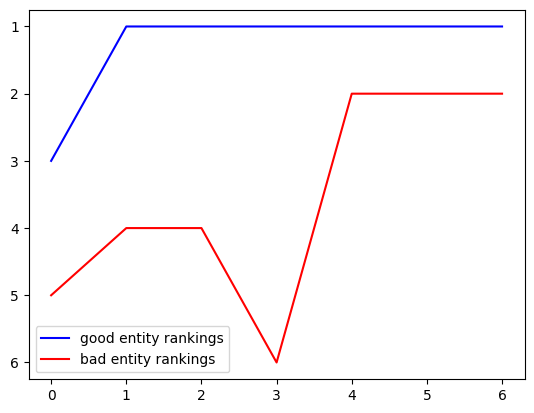

Mitigator AUC is: 7.0
Disinformer AUC is: 21.5
Total time taken for entire experiment 863.9226410388947


In [21]:

experiment = KnowledgeGraphMitigationExperiment('experiment_reem_random_greedy', 'FB15k-237', label_map_path, fact_in_question, good_entity, bad_entity, og_train_test_valid_paths=['results/experiment_reem_1/data/train.txt', test_path, valid_path],  prediction_type="tail", reduce_original=False, size_of_original=5, mode="necessary", model_name="ComplEx", first='mitigator', mitigator_strategy="greedy", disinformer_strategy="random")

experiment.run_experiment()


How do we implement a greedy strategy in our case?

- Factor in cost
- some claims are cheaper than others
- Degree of node can be used as proxy for cost and popularity